In [81]:
import sty
from sty import fg, bg, ef, rs


def redness(text, color):
    return bg(255, color, color) + text + bg.rs

def blueness(text, color):
    return bg(color, color, 255) + text + bg.rs

def greeness(text, color):
    return bg(color, 255, color) + text + bg.rs

In [366]:
import models
import torch
import numpy as np


def tensorify(input):
    sequence = len(input)
    buf = 0
    ids = np.zeros((sequence, 3), dtype=np.int64)                                                                                                                                          
    for i in range(0, sequence):
        buf += int(input[i])
        ids[i][int(input[i])] = 1   
        ids[i][2] = buf 
        
    target_id = torch.LongTensor(np.zeros((1), dtype=np.int64))                                                                                                                            
    target_id[0] = int(input[-1]) 
    return torch.Tensor(ids).unsqueeze_(0), target_id.unsqueeze_(0)  

feature_size = 3                                                                                                                                                                                   
hidden_size = 10                                                                                                                                                                                   
model = models.simpleLSTM(feature_size, hidden_size)
model.load_state_dict(torch.load("model")['state_dict'])

In [391]:


input = "111111110"




origin_hiddens = model.initHidden(layer=1, batch_size=1) #(h, c)
  
res = []
for i in range(0, len(input)-1):
    hiddens = copy.deepcopy(origin_hiddens)
    input_, target = tensorify(input[:(i+1)])
    output, hiddens = model(input_, hiddens)
    res.append(hiddens[0][0][0].detach().numpy())

In [392]:
np.exp(output[0][-1].detach().numpy())

max_val = np.zeros(len(res[0]))
min_val = np.zeros(len(res[0]))


'''
Normalization
'''
for i in range(0, len(res)):
    for j in range(0, len(res[i])):
        max_val[j] = max(max_val[j], res[i][j])
        min_val[j] = min(min_val[j], res[i][j])

In [326]:
def print_color(input, k, res, min_val, max_val):
    base = 256
    s = ""
    for i in range(0, len(input)-1):
        buf = (res[i][k] - min_val[k]) / (max_val[k] - min_val[k])
        s += redness(input[i],  int(buf * base))
    print (s)

In [393]:
for i in range(0, 10):
    print_color(input, i, res, min_val, max_val)

11111111
11111111
11111111
11111111
11111111
11111111
11111111
11111111
11111111
11111111


In [337]:
np.exp(output[0][-1].detach().numpy())

array([0.8796703 , 0.12032969], dtype=float32)

In [261]:
losses = [0.836734676361084, 0.693177330493927, 0.6958484888076782, 0.8323319673538208, 0.6923068761825562, 0.6971202373504639, 0.8315329313278198, 0.6935752034187317, 0.6936178803443909, 0.8311442971229553, 0.6933636784553527, 0.6933464765548706, 0.8311507105827332, 0.6931442141532898, 0.6935764193534851, 0.8319742441177368, 0.6935105681419372, 0.6932602643966674, 0.8309020638465882, 0.6938560724258422, 0.6935018539428711, 0.83129723072052, 0.6922296524047852, 0.691857659816742, 0.8314541220664978, 0.692365539073944, 0.6921877861022949, 0.8317402958869934, 0.6932908892631531, 0.6933696866035461, 0.8328418493270874, 0.6933560490608215, 0.6924703478813171, 0.833240807056427, 0.6914825081825257, 0.693737781047821, 0.830593490600586, 0.6930478811264038, 0.6930470705032349, 0.8323854207992554, 0.6928516745567321, 0.694010603427887, 0.8330453634262085, 0.6924028515815734, 0.6932391285896301, 0.8301056027412415, 0.6943344116210938, 0.6946349740028381, 0.8324642062187195, 0.6919777035713196, 0.6947896599769592, 0.830867862701416, 0.6928965449333191, 0.6930685877799988, 0.8317515611648559, 0.6919050812721252, 0.6926251888275147, 0.8340512990951539, 0.6924722075462342, 0.6925505518913269, 0.8314692497253418, 0.6924108028411865, 0.6939941644668579, 0.8310753583908081, 0.6921350717544555, 0.6946035027503967, 0.8331505417823791, 0.6932531714439392, 0.6921617388725281, 0.8322986960411072, 0.6926939487457275, 0.6935860991477967, 0.830517303943634, 0.6937043070793152, 0.6931658744812011, 0.8316672921180726, 0.6917270183563232, 0.6927386879920959, 0.8308579325675964, 0.692037558555603, 0.6947632789611816, 0.8312092065811157, 0.6936950564384461, 0.693317973613739, 0.8314055800437927, 0.6930501699447632, 0.6933923363685608, 0.8323759436607361, 0.693757700920105, 0.692215096950531, 0.8306856155395508, 0.6935619115829468, 0.6953644394874573, 0.8326602458953858, 0.6924759030342102, 0.6938861608505249, 0.8306578159332275, 0.6957195997238159, 0.6927395582199096, 0.8331230998039245, 0.6925490736961365, 0.6919362664222717, 0.8325794458389282, 0.6927871227264404, 0.6909613013267517, 0.8292018890380859, 0.6933866620063782, 0.6939024567604065, 0.8296097636222839, 0.6946737408638001, 0.6909779191017151, 0.8322917819023132, 0.6929073333740234, 0.6921109080314636, 0.8310881733894349, 0.6930245399475098, 0.6936056733131408, 0.8304496765136719, 0.6928896069526672, 0.6928874015808105, 0.832297968864441, 0.6927055478096008, 0.6927119374275208, 0.8310947299003602, 0.6931080222129822, 0.6920048236846924, 0.8313049674034119, 0.6930134773254395, 0.6920930027961731, 0.832963740825653, 0.6921202659606933, 0.6915343999862671, 0.8312803506851196, 0.6919592976570129, 0.6932874083518982, 0.8277255773544312, 0.6915647387504578, 0.698388421535492, 0.8308396100997925, 0.6941107034683227, 0.692898964881897, 0.8322858095169068, 0.6919371962547303, 0.6923037767410278, 0.8317204356193543, 0.6921904444694519, 0.6930620551109314, 0.8308265566825866, 0.6931467294692993, 0.6928616285324096, 0.8307638049125672, 0.695243525505066, 0.6908061265945434, 0.8315476059913636, 0.6905328154563903, 0.6942339897155761, 0.8305255770683289, 0.693298590183258, 0.6932690024375916, 0.8325939059257508, 0.6913348197937011, 0.6932206869125366, 0.8317800164222717, 0.6916198134422302, 0.6916375041007996, 0.8286088585853577, 0.693269670009613, 0.693759822845459, 0.8306064009666443, 0.6913354992866516, 0.6947157740592956, 0.8310107469558716, 0.6933835029602051, 0.6931309700012207, 0.8298388957977295, 0.6930697321891784, 0.6926668047904968, 0.8297338604927063, 0.6943517923355103, 0.6927024364471436, 0.8302364230155945, 0.692746353149414, 0.6919235587120056, 0.8289271593093872, 0.6906464338302613, 0.6925772547721862, 0.8340956330299377, 0.6893349528312683, 0.6900438666343689, 0.8300986409187316, 0.6914468884468079, 0.6911953449249267, 0.8312145471572876, 0.6907139897346497, 0.6904172301292419, 0.827241849899292, 0.6930477261543274, 0.6955374479293823, 0.8283892273902893, 0.6945285201072693, 0.690212094783783, 0.8320096254348754, 0.6896583676338196, 0.6901736974716186, 0.8335617184638977, 0.6914764642715454, 0.6855650544166565, 0.8246616840362548, 0.6909418702125549, 0.6942328810691833, 0.82503182888031, 0.6952015161514282, 0.6940693020820617, 0.82457035779953, 0.6878897070884704, 0.6913850545883179, 0.8303911328315735, 0.6926788568496705, 0.6859907269477844, 0.8296705961227417, 0.6861003994941711, 0.6876502275466919, 0.8301398158073425, 0.6919694185256958, 0.6814576983451843, 0.8226602435111999, 0.6914314150810241, 0.6894750475883484, 0.827122437953949, 0.6891947984695435, 0.6898586750030518, 0.8217882633209228, 0.6887700319290161, 0.6919997453689575, 0.8252023339271546, 0.686388087272644, 0.6897933006286621, 0.8358218789100647, 0.6872520446777344, 0.684637701511383, 0.8262184262275696, 0.6921464562416076, 0.6899332284927369, 0.8271825671195984, 0.6920993804931641, 0.6880476832389831, 0.8246038556098938, 0.6872121095657349, 0.6895754218101502, 0.8188215732574463, 0.6889141440391541, 0.693146538734436, 0.8230498552322387, 0.693166720867157, 0.6845040440559387, 0.8209812760353088, 0.6854234933853149, 0.6900848031044007, 0.823809552192688, 0.685372257232666, 0.695529329776764, 0.8292960047721862, 0.6802292108535767, 0.6930993795394897, 0.8213045477867127, 0.6911789655685425, 0.6862590193748475, 0.8248945236206054, 0.6937492966651917, 0.6810329794883728, 0.8298069119453431, 0.6821136713027954, 0.6876299619674683, 0.8217398762702942, 0.688481616973877, 0.6873789668083191, 0.8145623326301574, 0.6858316540718079, 0.6994622349739075, 0.8131297945976257, 0.6848684787750244, 0.6901431441307068, 0.830832040309906, 0.6834807157516479, 0.685060691833496, 0.8240811705589295, 0.6887701272964477, 0.6875227570533753, 0.8310933947563172, 0.6918964385986328, 0.6739875435829162, 0.82577143907547, 0.6847025394439697, 0.6819326400756835, 0.8102982640266418, 0.6943745374679565, 0.687351131439209, 0.8199779391288757, 0.6835642576217651, 0.6764063358306884, 0.8290210962295532, 0.6862028121948243, 0.6736117839813233, 0.8307457208633423, 0.6858209371566772, 0.6778061151504516, 0.8267796039581299, 0.692555022239685, 0.680375051498413, 0.8207461833953857, 0.6756417632102967, 0.6802807331085206, 0.8226052761077881, 0.6838838338851929, 0.6850868344306946, 0.8338292241096497, 0.6796681404113769, 0.6762235403060913, 0.819079327583313, 0.689237117767334, 0.6886682271957397, 0.8194165825843811, 0.678097915649414, 0.6873992800712585, 0.8182072877883911, 0.6853186130523682, 0.6842365622520447, 0.8227029085159302, 0.68428955078125, 0.689545476436615, 0.8119784951210022, 0.6836743116378784, 0.709109902381897, 0.8294360518455506, 0.6825896263122558, 0.6877619743347168, 0.8187477469444275, 0.683530056476593, 0.6791674852371216, 0.8153900742530823, 0.6908058047294616, 0.6824856400489807, 0.8280867338180542, 0.6787186980247497, 0.6836414456367492, 0.8150978922843933, 0.6964090585708618, 0.6692601680755615, 0.8169735908508301, 0.6892335057258606, 0.6808764100074768, 0.8388169884681702, 0.6701491475105286, 0.6783839464187622, 0.8245335698127747, 0.670889139175415, 0.6878906846046448, 0.7999276161193848, 0.6963617920875549, 0.6822920799255371, 0.8297868728637695, 0.6710329532623291, 0.6945695042610168, 0.8277348279953003, 0.6757707476615906, 0.6758162379264832, 0.8166747570037842, 0.6886251330375671, 0.6858026027679444, 0.8265797734260559, 0.6764807105064392, 0.6804177284240722, 0.8064734697341919, 0.6800500988960266, 0.6935710549354553, 0.8254694461822509, 0.6841913223266601, 0.6743366599082947, 0.8184270262718201, 0.6794623017311097, 0.678289818763733, 0.798461663722992, 0.6905759334564209, 0.6857314229011535, 0.8054323196411133, 0.6843938946723938, 0.695259428024292, 0.82152179479599, 0.6737665653228759, 0.6757881879806519, 0.8331513643264771, 0.67066490650177, 0.6752671599388123, 0.8220041513442993, 0.6794303178787231, 0.6905091285705567, 0.8243568539619446, 0.6780330181121826, 0.6812838792800904, 0.8101196765899659, 0.685886025428772, 0.6820268750190734, 0.8252861499786377, 0.6788907051086426, 0.6724761843681335, 0.8057627439498901, 0.6885348677635192, 0.6943025350570678, 0.8133481979370117, 0.6823781251907348, 0.695771586894989, 0.8206234574317932, 0.6628837585449219, 0.692158329486847, 0.8283435463905334, 0.6803918719291687, 0.6690733551979064, 0.8132585406303405, 0.6769006848335266, 0.6801797747612, 0.8247215509414673, 0.6765041947364807, 0.6684584856033325, 0.8191804051399231, 0.689737856388092, 0.6936684012413025, 0.8215360522270203, 0.6901939392089844, 0.6773924827575684, 0.8172990441322326, 0.6705293893814087, 0.6845914244651794, 0.8055241465568542, 0.7020122766494751, 0.6795817852020264, 0.7998124241828919, 0.6862535834312439, 0.6874638557434082, 0.8305262684822082, 0.6825727581977844, 0.6684544205665588, 0.801592481136322, 0.6896613478660584, 0.6855865478515625, 0.8228397727012634, 0.6845949530601502, 0.6680074572563172, 0.8150183677673339, 0.6862545490264893, 0.6813712358474732, 0.8192494988441468, 0.6639104008674621, 0.6873995780944824, 0.8108536005020142, 0.6909183025360107, 0.6827620029449463, 0.8065025925636291, 0.6843221306800842, 0.6731608271598816, 0.8140317916870117, 0.6815029501914978, 0.6848963141441345, 0.8233553647994996, 0.6800315976142883, 0.6797004461288452, 0.8288607478141785, 0.683044147491455, 0.6689261794090271, 0.8096720337867737, 0.686993420124054, 0.6744703531265259, 0.8242733955383301, 0.6757952690124511, 0.6745043516159057, 0.8174258947372437, 0.6764542460441589, 0.679543650150299, 0.8289869666099549, 0.6813685297966003, 0.6666527032852173, 0.8079811692237854, 0.6878715753555298, 0.6943373918533325, 0.8152465343475341, 0.6726233839988709, 0.6727656483650207, 0.8366904616355896, 0.6796200990676879, 0.6624041795730591, 0.8218022346496582, 0.6736821413040162, 0.6673594355583191, 0.8051981806755066, 0.6813317894935608, 0.6806723833084106, 0.8036040544509888, 0.6940842866897583, 0.667826795578003, 0.8208365559577941, 0.6804673790931701, 0.6700666546821594, 0.8265353202819824, 0.6680610418319702, 0.6799542665481567, 0.809528648853302, 0.6885032773017883, 0.6724782586097717, 0.8169072151184082, 0.6963771700859069, 0.6586135387420654, 0.8066224575042724, 0.6832543969154358, 0.6827252507209778, 0.8059036374092102, 0.6866952657699585, 0.6642700791358948, 0.8090688943862915, 0.6816792249679565, 0.6791403770446778, 0.8126575231552124, 0.676382052898407, 0.6897950530052185, 0.8063590288162231, 0.6729863524436951, 0.6781546235084533, 0.8095783710479736, 0.6940860390663147, 0.6731017231941223, 0.81810142993927, 0.6809548735618591, 0.674862289428711, 0.7983981013298035, 0.6901808738708496, 0.6805412292480468, 0.8131795644760131, 0.6820284366607666, 0.6824302792549133, 0.813358211517334, 0.6737550735473633, 0.6758862376213074, 0.8107456207275391, 0.6729904532432556, 0.6924843907356262, 0.8116746306419372, 0.6836647629737854, 0.6716311573982239, 0.806466019153595, 0.6801855325698852, 0.6834930658340455, 0.808932876586914, 0.6792397379875184, 0.6798046588897705, 0.8241270422935486, 0.6807252764701843, 0.6776356339454651, 0.8270830750465393, 0.6757143139839172, 0.6689109802246094, 0.8020584583282471, 0.6816670656204223, 0.6768266797065735, 0.8087128162384033, 0.6783817291259766, 0.6773613095283508, 0.7994933366775513, 0.6620845317840576, 0.7039365887641906, 0.8011473774909973, 0.6988063335418702, 0.6779767513275147, 0.8072969675064087, 0.673392367362976, 0.6711159706115722, 0.8102432608604431, 0.6794106125831604, 0.6717246055603028, 0.8190135955810547, 0.6738247990608215, 0.6794522404670715, 0.8222568511962891, 0.6615474343299865, 0.677984619140625, 0.8059579610824585, 0.6771253228187561, 0.6895039796829223, 0.8139244318008423, 0.6733209729194641, 0.6880068778991699, 0.8031837582588196, 0.6858491063117981, 0.6735547661781311, 0.8117993950843811, 0.6820429801940918, 0.6643980026245118, 0.8233170509338379, 0.6643256068229675, 0.6748653888702393, 0.7950281023979187, 0.6654510140419007, 0.6875842690467835, 0.8177910089492798, 0.6721768260002137, 0.6684584856033325, 0.8158633232116699, 0.6850605010986328, 0.6836653232574463, 0.8342078328132629, 0.6693489193916321, 0.671801233291626, 0.8035888075828552, 0.6842990279197693, 0.6921751976013184, 0.8096669912338257, 0.6837838292121887, 0.6699678778648377, 0.8170927882194519, 0.6829816102981567, 0.6641719222068787, 0.8037807822227478, 0.6896855235099792, 0.6743852496147156, 0.8282017230987548, 0.6776331424713135, 0.6607011795043946, 0.800508689880371, 0.6910470128059387, 0.6827421665191651, 0.8204543113708496, 0.6878719687461853, 0.6651657938957214, 0.8316452145576477, 0.6665889978408813, 0.6686168909072876, 0.8191804647445678, 0.6756303310394287, 0.6755374431610107, 0.8201143622398377, 0.6784786105155944, 0.6658931374549866, 0.8364628791809082, 0.6824649691581726, 0.6549448728561401, 0.8045887231826783, 0.6740796327590942, 0.6749517917633057, 0.8111024379730225, 0.6695928573608398, 0.683043646812439, 0.8196380019187928, 0.6752182006835937, 0.6659351110458374, 0.7987654685974122, 0.6764327168464661, 0.6871873378753662, 0.7989310979843139, 0.676240599155426, 0.672700834274292, 0.7964150786399842, 0.6835731506347656, 0.6921631574630738, 0.7957833170890808, 0.6761398196220398, 0.6893070697784424, 0.8166316986083985, 0.6721492528915405, 0.6691447377204895, 0.8091546297073364, 0.6692825436592102, 0.680524718761444, 0.8217564463615418, 0.6554281949996948, 0.6794675588607788, 0.8023906469345092, 0.6670377850532532, 0.7017246723175049, 0.8112027287483216, 0.6836210370063782, 0.6655321598052979, 0.8063014626502991, 0.6722932577133178, 0.6847198843955994, 0.8140908122062683, 0.671061635017395, 0.678553581237793, 0.8160384654998779, 0.6703503370285034, 0.663082730770111, 0.8092123627662658, 0.6639855146408081, 0.676857078075409, 0.7976375579833984, 0.6800923347473145, 0.6955134987831115, 0.8130203008651733, 0.6792821764945984, 0.6795068502426147, 0.8069498300552368, 0.683524775505066, 0.6764367818832397, 0.8103701710700989, 0.6678204655647277, 0.6901060461997985, 0.8228690981864929, 0.678157639503479, 0.683063292503357, 0.8141289830207825, 0.6678635358810425, 0.6774845480918884, 0.8131377577781678, 0.6631418108940125, 0.6895211219787598, 0.8060395836830139, 0.6813291430473327, 0.6823309779167175, 0.810239565372467, 0.6640063643455505, 0.6776167154312134, 0.8124346494674682, 0.6729255199432373, 0.6865196704864502, 0.8185683012008667, 0.6774907588958741, 0.6704620838165283, 0.8195913910865784, 0.6640808820724488, 0.672262680530548, 0.8127742886543274, 0.6708547830581665, 0.6781505346298218, 0.8216776609420776, 0.673832094669342, 0.6647692680358886, 0.8029467582702636, 0.6718018412590027, 0.6825999021530151, 0.7973134517669678, 0.6721381545066833, 0.6896981954574585, 0.8301149010658264, 0.6699173331260682, 0.6637228727340698, 0.7877885699272156, 0.6951404571533203, 0.6852875471115112, 0.8164010167121887, 0.6702458739280701, 0.6781061053276062, 0.8284474968910217, 0.6729149222373962, 0.6645700097084045, 0.7986522793769837, 0.680832839012146, 0.6673081517219543, 0.8112325191497802, 0.6713054537773132, 0.6842933177947998, 0.8116878509521485, 0.6801987886428833, 0.677907383441925, 0.8121945023536682, 0.6633409857749939, 0.6878653645515442, 0.8155994772911072, 0.6698814153671264, 0.6641153216361999, 0.8173437714576721, 0.6723839521408081, 0.6748255372047425, 0.8133060693740845, 0.6677315354347229, 0.6791854739189148, 0.8175060987472534, 0.6838871717453003, 0.6610176682472229, 0.8286536931991577, 0.652463722229004, 0.6688795447349548, 0.8138869047164917, 0.6731684803962708, 0.6739530205726624, 0.814853036403656, 0.6774057030677796, 0.665264904499054, 0.8173711776733399, 0.6698002576828003, 0.6784808993339538, 0.8094900131225586, 0.6639257073402405, 0.6758875250816345, 0.7999308347702027, 0.6799092650413513, 0.693224036693573, 0.8060418248176575, 0.6728230357170105, 0.6670405983924865, 0.8282769799232483, 0.6693861961364747, 0.6784548401832581, 0.8156530380249023, 0.6728459239006043, 0.6599814057350158, 0.7958457708358765, 0.6739153265953064, 0.6788164734840393, 0.8151314496994019, 0.6821364521980285, 0.6630987882614136, 0.8326502203941345, 0.6664567112922668, 0.6711657047271729, 0.7913351058959961, 0.6722861289978027, 0.6731981635093689, 0.7988090276718139, 0.673162317276001, 0.6615232944488525, 0.8141889333724975, 0.6691183686256409, 0.6756210565567017, 0.8138871669769288, 0.6704418897628784, 0.6886523127555847, 0.8239088296890259, 0.6718796610832214, 0.6626131176948548, 0.8003436207771302, 0.6715129971504211, 0.6824438571929932, 0.8035802602767944, 0.6730263710021973, 0.6759127616882324, 0.7969263911247253, 0.6746508359909058, 0.6902234554290771, 0.8089892029762268, 0.6675859570503235, 0.669953215122223, 0.8109492897987366, 0.673617160320282, 0.6811547994613647, 0.809746778011322, 0.6718721032142639, 0.686331307888031, 0.8229818224906922, 0.6762181997299195, 0.6598440527915954, 0.7947455525398255, 0.6790419459342957, 0.672200870513916, 0.820403516292572, 0.6628822088241577, 0.6701817631721496, 0.8100613117218017, 0.6714303612709045, 0.6766867876052857, 0.816282331943512, 0.6611741304397583, 0.6925552964210511, 0.7924740195274353, 0.681127381324768, 0.6827738881111145, 0.7977076172828674, 0.6847986817359925, 0.6706526637077331, 0.8191491842269898, 0.6694546699523926, 0.6814779043197632, 0.8103912115097046, 0.6589654922485352, 0.6719070792198181, 0.802716875076294, 0.6662184119224548, 0.687760841846466, 0.8202188611030579, 0.6796315312385559, 0.6594312429428101, 0.8100825428962708, 0.665701174736023, 0.6624543786048889, 0.8027963757514953, 0.6760144472122193, 0.6670927405357361, 0.8033407926559448, 0.6937057495117187, 0.6671546697616577, 0.8028589487075806, 0.6664902567863464, 0.68287593126297, 0.7988833665847779, 0.6645120024681092, 0.6851323366165161, 0.7981881976127625, 0.6797437310218811, 0.6596384286880493, 0.8053985476493836, 0.6628352046012879, 0.6737619400024414, 0.7971196174621582, 0.666296124458313, 0.6871172666549683, 0.8218182802200318, 0.6600134491920471, 0.6659639239311218, 0.8120275735855103, 0.661586582660675, 0.6658885598182678, 0.8015730500221252, 0.6713070273399353, 0.671529757976532, 0.8253701686859131, 0.6664611577987671, 0.6566300630569458, 0.8056057929992676, 0.6630233407020569, 0.6697079420089722, 0.8034607887268066, 0.6813518285751343, 0.659949779510498, 0.8030712604522705, 0.6759494781494141, 0.665264368057251, 0.8199261546134948, 0.6529146075248718, 0.6832812309265137, 0.8139623999595642, 0.6415464043617248, 0.6852403283119202, 0.802921724319458, 0.6615432858467102, 0.6668262004852294, 0.7973377227783203, 0.6689623475074769, 0.6753547668457032, 0.8195919871330262, 0.671412980556488, 0.6653891682624817, 0.7948339581489563, 0.6792636394500733, 0.6742884159088135, 0.7939100146293641, 0.6770972847938538, 0.6743255853652954, 0.8337839722633362, 0.6519577503204346, 0.6613025665283203, 0.7928385138511658, 0.6759219169616699, 0.6761767268180847, 0.7899848818778992, 0.690928316116333, 0.6736310958862305, 0.8040821552276611, 0.6607349634170532, 0.6674537539482117, 0.804976224899292, 0.6604479312896728, 0.682270622253418, 0.8047842741012573, 0.6663437724113465, 0.666243052482605, 0.7891911149024964, 0.690023672580719, 0.688218891620636, 0.8170500040054322, 0.6854866862297058, 0.6685518026351929, 0.8146013140678405, 0.6624283909797668, 0.6651589870452881, 0.8008078694343567, 0.6670820116996765, 0.677511727809906, 0.8125036835670472, 0.6877055883407592, 0.6574206590652466, 0.808541738986969, 0.6662154078483582, 0.6690827131271362, 0.7991219520568847, 0.6734945893287658, 0.6626271486282349, 0.7931336045265198, 0.6670682430267334, 0.6884654879570007, 0.8188122391700745, 0.6560098528862, 0.6607043743133545, 0.7878710150718689, 0.6704503774642945, 0.6888225197792053, 0.8252351999282836, 0.6749344944953919, 0.6541154861450196, 0.8210421204566956, 0.6595825314521789, 0.6751583218574524, 0.790454089641571, 0.668914520740509, 0.6756578683853149, 0.8163134932518006, 0.6540169954299927, 0.6625346302986145, 0.7877287268638611, 0.6733420610427856, 0.6580542683601379, 0.8041817426681519, 0.6853342056274414, 0.6716729402542114, 0.797394597530365, 0.6626288890838623, 0.6741585493087768, 0.8000104546546936, 0.6637951135635376, 0.6631004691123963, 0.7860005617141723, 0.6678958773612976, 0.6627655267715454, 0.8100924611091613, 0.6748778820037842, 0.6505915641784668, 0.8024032711982727, 0.6917927384376525, 0.6607258200645447, 0.795563793182373, 0.6705263018608093, 0.6647684216499329, 0.7798646688461304, 0.6752624630928039, 0.6862455368041992, 0.8265563726425171, 0.6501937627792358, 0.6477865219116211, 0.7789023756980896, 0.6649283766746521, 0.6844955444335937, 0.7812824249267578, 0.6842510938644409, 0.6769622445106507, 0.8044702649116516, 0.6661128997802734, 0.669501519203186, 0.7985613465309143, 0.6544288516044616, 0.6812383770942688, 0.7955854535102844, 0.6689334988594056, 0.6695394158363343, 0.7939895510673523, 0.6544047713279724, 0.6705536842346191, 0.8150949239730835, 0.6713426828384399, 0.6689608097076416, 0.7984067320823669, 0.6728076815605164, 0.6648660659790039, 0.7976561427116394, 0.6446630001068115, 0.6623296022415162, 0.7941299438476562, 0.6697000503540039, 0.6561450362205505, 0.7913264155387878, 0.6672537088394165, 0.6811842560768128, 0.8202310562133789, 0.6548640131950378, 0.6656513214111328, 0.7991620540618897, 0.6610790014266967, 0.6692322254180908, 0.8032518625259399, 0.6739030838012695, 0.6561021208763123, 0.778604519367218, 0.6685735583305359, 0.6801021218299865, 0.7962848544120789, 0.6534952998161316, 0.6848719000816346, 0.8464196801185608, 0.656633460521698, 0.6259203433990479, 0.7847241878509521, 0.6611278057098389, 0.6767079949378967, 0.822648024559021, 0.6605119585990906, 0.6525567770004272, 0.797858726978302, 0.6665342688560486, 0.6587249636650085, 0.7665775895118714, 0.6661450743675232, 0.6629385590553284, 0.8171374440193176, 0.6549376606941223, 0.6544557571411133, 0.8002220869064331, 0.6728962898254395, 0.6605048298835754, 0.7848113298416137, 0.6509702801704407, 0.6689884543418885, 0.8048221230506897, 0.6416893482208252, 0.6879599571228028, 0.7937135338783264, 0.6590766072273254, 0.6816874384880066, 0.7978102803230286, 0.6490365028381347, 0.6403228282928467, 0.7734623312950134, 0.6646802067756653, 0.6569071173667907, 0.8003289461135864, 0.6574386358261108, 0.6637171983718873, 0.7949110627174377, 0.6723474383354187, 0.645047926902771, 0.7912863254547119, 0.672960388660431, 0.6568504333496094, 0.7764673948287963, 0.6474298954010009, 0.6561686396598816, 0.7760104656219482, 0.6715395331382752, 0.6584332227706909, 0.7752532124519348, 0.6647557139396667, 0.6723478078842163, 0.7768807172775268, 0.6669491529464722, 0.6750925660133362, 0.7983471393585205, 0.6640673875808716, 0.6682588815689087, 0.789507520198822, 0.6464552998542785, 0.6752574563026428, 0.8017527103424072, 0.651850700378418, 0.667254364490509, 0.7728988885879516, 0.655183744430542, 0.6559376955032349, 0.7954755544662475, 0.666429877281189, 0.656662118434906, 0.8091853022575378, 0.6424009561538696, 0.6468390703201294, 0.7689245700836181, 0.6881739735603333, 0.6482695460319519, 0.7922336220741272, 0.652788269519806, 0.6641210675239563, 0.7983885765075683, 0.6488282203674316, 0.6527095675468445, 0.8044672250747681, 0.6646459937095642, 0.6428419351577759, 0.7950433135032654, 0.6552203893661499, 0.6599264025688172, 0.7735230326652527, 0.6726645469665528, 0.6423159956932067, 0.7737804889678955, 0.6676856756210328, 0.6613668441772461, 0.7749793887138366, 0.6720471262931824, 0.6662803888320923, 0.8020368218421936, 0.6600896000862122, 0.6430580854415894, 0.7984605193138122, 0.6584115982055664, 0.6444599866867066, 0.7988162040710449, 0.6386765003204345, 0.6404438853263855, 0.7515412092208862, 0.6501789093017578, 0.6710167765617371, 0.7874039649963379, 0.66225506067276, 0.6491137027740479, 0.7785251140594482, 0.6359695434570313, 0.665482223033905, 0.7964283585548401, 0.6380895853042603, 0.6444742441177368, 0.7436477899551391, 0.6719732999801635, 0.6681424856185914, 0.7794932365417481, 0.6684891581535339, 0.6403294444084168, 0.7751455068588257, 0.6526196837425232, 0.6352097630500794, 0.8010579586029053, 0.6471034407615661, 0.6407725811004639, 0.7805816054344177, 0.6673912167549133, 0.636245858669281, 0.7686079859733581, 0.6679530143737793, 0.6497168183326721, 0.7715314149856567, 0.6432749629020691, 0.6508898735046387, 0.7871811985969543, 0.6418664455413818, 0.6492579221725464, 0.7596687912940979, 0.6560036301612854, 0.6842767834663391, 0.7382620573043823, 0.65338054895401, 0.683646821975708, 0.780969750881195, 0.6436874508857727, 0.6537009954452515, 0.792279326915741, 0.6520788550376893, 0.6395117759704589, 0.776801073551178, 0.6446410298347474, 0.6382058024406433, 0.7889042854309082, 0.6545836329460144, 0.6245453476905822, 0.7638022303581238, 0.6576260924339294, 0.6408418416976929, 0.7800903558731079, 0.6344208121299744, 0.6518837332725524, 0.7800927281379699, 0.6481204390525818, 0.6497200012207032, 0.7573181748390198, 0.6315134763717651, 0.6759904265403748, 0.7843426465988159, 0.6218508601188659, 0.6534259200096131, 0.7467507362365723, 0.6493218660354614, 0.6530740261077881, 0.7606838345527649, 0.6284703373908996, 0.6645396828651429, 0.76463303565979, 0.6327163696289062, 0.6441906452178955, 0.7788365006446838, 0.6491432547569275, 0.6525790572166443, 0.8001491546630859, 0.6392409086227417, 0.6340713620185852, 0.7727388620376587, 0.6685802102088928, 0.6462941408157349, 0.7640763401985169, 0.6520880937576294, 0.6465691685676574, 0.7776325106620788, 0.6334789395332336, 0.6381861805915833, 0.7725490689277649, 0.6484837412834168, 0.6282567977905273, 0.7620505928993225, 0.6265642523765564, 0.6631108522415161, 0.7659645318984986, 0.6687757134437561, 0.6354478478431702, 0.7522463440895081, 0.6468080997467041, 0.6309285521507263, 0.7683014273643494, 0.6437012195587158, 0.6433884501457214, 0.7821598291397095, 0.6311664700508117, 0.6198206782341004, 0.760107696056366, 0.6642607688903809, 0.6337433099746704, 0.7759002566337585, 0.6190855622291564, 0.609885060787201, 0.7659457206726075, 0.6504670858383179, 0.6239743709564209, 0.7597889304161072, 0.6384627103805542, 0.6422159194946289, 0.7751313805580139, 0.6348679900169373, 0.6270073771476745, 0.7878340125083924, 0.615177845954895, 0.6360653758049011, 0.7563421249389648, 0.6390350699424744, 0.6537094235420227, 0.7816754102706909, 0.6252445697784423, 0.6079404592514038, 0.7394688129425049, 0.6528887867927551, 0.6369193911552429, 0.7705442428588867, 0.6134903311729432, 0.6440507054328919, 0.7579687237739563, 0.6616407036781311, 0.6346479535102845, 0.7711951971054077, 0.642541766166687, 0.6171161890029907, 0.7770293831825257, 0.6319175839424134, 0.6239822983741761, 0.7756830215454101, 0.6423995971679688, 0.6028373599052429, 0.7391306757926941, 0.6427103996276855, 0.6248635053634644, 0.7473422288894653, 0.6363821983337402, 0.6210730075836182, 0.7526971936225891, 0.6261085391044616, 0.6283890128135681, 0.7616209030151367, 0.6374897956848145, 0.6466143012046814, 0.7472025752067566, 0.6273207783699035, 0.6474050641059875, 0.7450167298316955, 0.6369365215301513, 0.6366093039512635, 0.7581008076667786, 0.6357908844947815, 0.613757336139679, 0.7614030599594116, 0.6568091869354248, 0.6284810185432435, 0.7660497903823853, 0.6190191149711609, 0.6325987815856934, 0.7773331046104431, 0.612609577178955, 0.6314809441566467, 0.7526016354560852, 0.6532678842544556, 0.6269717454910279, 0.7603012800216675, 0.6334964990615845, 0.606273102760315, 0.7649131059646607, 0.6150116086006164, 0.6383345484733581, 0.719465184211731, 0.6220951795578002, 0.6336513757705688, 0.7684180855751037, 0.6211913228034973, 0.6198853611946106, 0.744503915309906, 0.6447329521179199, 0.6101709604263306, 0.7644395232200623, 0.6335805773735046, 0.6255786299705506, 0.7687236070632935, 0.6225254774093628, 0.617498779296875, 0.746188509464264, 0.6194808602333068, 0.6260523200035095, 0.745077621936798, 0.6324481844902039, 0.6087838530540466, 0.7210146903991699, 0.6507115721702575, 0.6344258427619934, 0.733734393119812, 0.607107138633728, 0.6504899144172669, 0.7588658094406128, 0.5694534182548523, 0.6394350290298462, 0.7272762298583985, 0.6301315903663636, 0.6426278114318847, 0.746801209449768, 0.5971295475959778, 0.6253181457519531, 0.7286072492599487, 0.6315225481986999, 0.6116507768630981, 0.7669963479042053, 0.6303353548049927, 0.5977818250656128, 0.7644311904907226, 0.6110222220420838, 0.615737795829773, 0.7354944705963135, 0.6423292517662048, 0.6352288961410523, 0.7343433618545532, 0.6042502760887146, 0.6313762307167053, 0.7545549631118774, 0.6278796553611755, 0.5995242714881897, 0.722126817703247, 0.6401612877845764, 0.6169110178947449, 0.7490235924720764, 0.5980684995651245, 0.6253321647644043, 0.7363300800323487, 0.6123911619186402, 0.6236633896827698, 0.7530846357345581, 0.6070379376411438, 0.6012541055679321, 0.7206016421318054, 0.6439956784248352, 0.6376064538955688, 0.7321622014045716, 0.6135665655136109, 0.620870316028595, 0.7428547501564026, 0.6002357482910157, 0.6176010727882385, 0.7385918378829956, 0.6032945036888122, 0.6127668976783752, 0.7326698541641236, 0.6284067511558533, 0.591847836971283, 0.7491642594337463, 0.5859938502311707, 0.6285834312438965, 0.7353410601615906, 0.6112945795059204, 0.6129534244537354, 0.7115313649177551, 0.5973733782768249, 0.6223468899726867, 0.7153904914855957, 0.6117660880088807, 0.6466612339019775, 0.740186583995819, 0.6056901097297669, 0.5970354437828064, 0.7486619114875793, 0.6098005890846252, 0.5898329734802246, 0.7591515064239502, 0.5920479893684387, 0.617137336730957, 0.7143157362937927, 0.6102916598320007, 0.6009313106536865, 0.7272263050079346, 0.5791055917739868, 0.5995296120643616, 0.7450850009918213, 0.6180159568786621, 0.5755097389221191, 0.7415124177932739, 0.587771213054657, 0.6042485117912293, 0.7510635256767273, 0.6244717121124268, 0.5898342967033386, 0.727427089214325, 0.5951296210289001, 0.6162841796875, 0.7414995789527893, 0.578551459312439, 0.600113046169281, 0.7069862842559814, 0.5901965141296387, 0.6080337166786194, 0.7075343489646911, 0.6165108919143677, 0.6175346493721008, 0.7515308022499084, 0.6115843296051026, 0.5941182136535644, 0.7139943957328796, 0.5967594027519226, 0.6015552878379822, 0.733377206325531, 0.5968593001365662, 0.6016126155853272, 0.7296575903892517, 0.6228284239768982, 0.5894320011138916, 0.7261090517044068, 0.5870863556861877, 0.5954958200454712, 0.7298189759254455, 0.5723649501800537, 0.5885648727416992, 0.693998908996582, 0.5847849786281586, 0.5875630497932434, 0.712307620048523, 0.590053403377533, 0.6138302445411682, 0.7328056812286377, 0.5755651354789734, 0.6104184269905091, 0.7347277402877808, 0.5895849823951721, 0.5859921932220459, 0.7152910828590393, 0.5769913077354432, 0.611038601398468, 0.7030932068824768, 0.5896907567977905, 0.576445484161377, 0.7347392439842224, 0.5765187382698059, 0.5896171808242798, 0.6765521407127381, 0.6271360635757446, 0.6104548454284668, 0.7011366605758667, 0.6063122749328613, 0.5968878030776977, 0.7065834164619446, 0.5513437986373901, 0.6050663709640502, 0.677249801158905, 0.6251657843589783, 0.5534524142742157, 0.7491500973701477, 0.5559329748153686, 0.567534065246582, 0.7347755432128906, 0.5726190030574798, 0.5745180726051331, 0.7002526879310608, 0.5800081372261048, 0.6053439140319824, 0.7349400281906128, 0.5693974733352661, 0.5935052633285522, 0.717279064655304, 0.5821447610855103, 0.5887415170669555, 0.7032305717468261, 0.565201199054718, 0.5795317888259888, 0.6976604342460633, 0.5790365934371948, 0.5691885232925415, 0.6916286528110505, 0.6122788786888123, 0.5671222150325775, 0.6663031578063965, 0.6056403756141663, 0.5984696269035339, 0.6707920432090759, 0.554446029663086, 0.5935586214065551, 0.7128518462181092, 0.5771296381950378, 0.5696203827857971, 0.6839666366577148, 0.5629570126533509, 0.5850815892219543, 0.666843181848526, 0.5789219021797181, 0.5956051230430603, 0.7003453135490417, 0.5768157720565796, 0.5619985938072205, 0.6788016319274902, 0.5531919360160827, 0.5811799168586731, 0.6697070181369782, 0.5811212658882141, 0.570050585269928, 0.6833104014396667, 0.5534332156181335, 0.5769237756729126, 0.6625734031200409, 0.555963397026062, 0.5838011503219604, 0.6849049925804138, 0.5654350876808166, 0.5769689917564392, 0.6963330507278442, 0.5480558395385742, 0.56341712474823, 0.6862998604774475, 0.573445075750351, 0.5585075139999389, 0.6689215183258057, 0.5155179619789123, 0.5944353699684143, 0.6789143562316895, 0.572726571559906, 0.5434531271457672, 0.6651639103889465, 0.5535021305084229, 0.5839691400527954, 0.6755843758583069, 0.5566756784915924, 0.5810708403587341, 0.6863453388214111, 0.5645286798477173, 0.5446671664714813, 0.6685839653015136, 0.5325107574462891, 0.5674348711967468, 0.6864331364631653, 0.5544511556625367, 0.5706190347671509, 0.6743037581443787, 0.5460389971733093, 0.5603459715843201, 0.6926652550697326, 0.5422184705734253, 0.5557661890983582, 0.6627241253852845, 0.5443350732326507, 0.5691779792308808, 0.6633784949779511, 0.544679993391037, 0.5570529937744141, 0.6552896618843078, 0.5308794200420379, 0.5913928031921387, 0.6333218932151794, 0.5559384822845459, 0.5509568750858307, 0.6529483258724212, 0.5609644532203675, 0.5294992327690125, 0.6719054162502289, 0.5439015984535217, 0.5670032858848572, 0.6665261328220368, 0.5209294736385346, 0.5648083925247193, 0.6581765472888946, 0.5536447286605835, 0.5507222294807435, 0.6546002924442291, 0.5372918367385864, 0.5281728088855744, 0.6296496212482452, 0.5371241927146911, 0.574271309375763, 0.6611128807067871, 0.5544455111026764, 0.5555528163909912, 0.6471698760986329, 0.5756345748901367, 0.5384188771247864, 0.6437024116516114, 0.5306562125682831, 0.558414900302887, 0.6300294518470764, 0.5561758935451507, 0.5752016425132751, 0.6544199347496032, 0.5178733348846436, 0.5317304372787476, 0.6642160773277282, 0.48933002948760984, 0.5581214666366577, 0.640241414308548, 0.522036075592041, 0.5712715029716492, 0.6604236364364624, 0.5212276816368103, 0.5229525566101074, 0.616970556974411, 0.527788519859314, 0.5536429822444916, 0.635673850774765, 0.5592723369598389, 0.5423681855201721, 0.630237877368927, 0.5352673232555389, 0.524466198682785, 0.6408203840255737, 0.5148259162902832, 0.5220685064792633, 0.6521127581596374, 0.5246343910694122, 0.5352651059627533, 0.6371965169906616, 0.5538295209407806, 0.5414460897445679, 0.6101110517978668, 0.5318089842796325, 0.5575282335281372, 0.6210567712783813, 0.5182486951351166, 0.5543262720108032, 0.6501462697982788, 0.5154577314853668, 0.5319597840309143, 0.6391552984714508, 0.5036820709705353, 0.5046990633010864, 0.6412050604820252, 0.5068884193897247, 0.5367668628692627, 0.6081004858016967, 0.48342198729515073, 0.5173094511032105, 0.6207939326763153, 0.5332478582859039, 0.49745550751686096, 0.6079645097255707, 0.5136121869087219, 0.5391905903816223, 0.615329772233963, 0.5121864974498749, 0.537179583311081, 0.6399384260177612, 0.49313047528266907, 0.4810055732727051, 0.6419115245342255, 0.5168010354042053, 0.5222683548927307, 0.6100461781024933, 0.5034441292285919, 0.5182567596435547, 0.6096201837062836, 0.4779481291770935, 0.5344341576099396, 0.5887008368968963, 0.5373047411441803, 0.5083282232284546, 0.576684296131134, 0.5124921560287475, 0.519559770822525, 0.5795278191566468, 0.5496454417705536, 0.4738067269325256, 0.5914324581623077, 0.4806387901306152, 0.5132192969322205, 0.5939024686813354, 0.5058562457561493, 0.49387326240539553, 0.5885528445243835, 0.5025467813014984, 0.5029281735420227, 0.5717829883098602, 0.4867917776107788, 0.527807492017746, 0.5848730087280274, 0.46987350583076476, 0.5147259533405304, 0.5921042382717132, 0.49676272869110105, 0.502726697921753, 0.5945676922798157, 0.5252740383148193, 0.5234732329845428, 0.5721897006034851, 0.46531628370285033, 0.536259651184082, 0.5833437502384186, 0.48419464826583863, 0.4817815124988556, 0.5656686961650849, 0.4917658269405365, 0.5134893238544465, 0.5598200738430024, 0.47967725396156313, 0.45861867666244505, 0.5908541738986969, 0.47135602235794066, 0.4959295868873596, 0.5946174740791321, 0.46795947551727296, 0.522764015197754, 0.5798195660114288, 0.47312699556350707, 0.4940161228179932, 0.5842897176742554, 0.4492847263813019, 0.4793432652950287, 0.6014372050762177, 0.4902261793613434, 0.45620833039283754, 0.5774308383464813, 0.49090219140052793, 0.43824689388275145, 0.5751746952533722, 0.48858914375305174, 0.4542736053466797, 0.569450855255127, 0.4741676926612854, 0.4928959488868713, 0.6053763806819916, 0.4656250894069672, 0.47868860363960264, 0.5506439745426178, 0.5023010730743408, 0.47791448831558225, 0.6016266942024231, 0.445437890291214, 0.44930450320243837, 0.5959126114845276, 0.4680642008781433, 0.44669554233551023, 0.5612642168998718, 0.49019556641578677, 0.46880637407302855, 0.5605574190616608, 0.4534186065196991, 0.41901259422302245, 0.5779568791389466, 0.48490885496139524, 0.4654374778270721, 0.5545141220092773, 0.46687928438186643, 0.4596434772014618, 0.566560423374176, 0.47917444109916685, 0.4578911900520325, 0.5342234611511231, 0.4399210810661316, 0.47465682625770567, 0.5333356082439422, 0.46556280851364135, 0.48367415070533754, 0.5448182582855224, 0.46601165533065797, 0.4675979971885681, 0.5570790529251098, 0.47307816743850706, 0.4490269303321838, 0.5219892621040344, 0.44244430065155027, 0.45316700339317323, 0.5838843047618866, 0.43414788842201235, 0.4329383909702301, 0.5474556744098663, 0.4547900319099426, 0.46777727007865905, 0.5167151272296906, 0.44534918665885925, 0.5126176416873932, 0.5391480267047882, 0.459753280878067, 0.4335518658161163, 0.5286668717861176, 0.44284290075302124, 0.4752033770084381, 0.5124757170677186, 0.4555652618408203, 0.4753656148910522, 0.5339476943016053, 0.45517667531967165, 0.47174311876297, 0.5531480967998504, 0.47436938881874086, 0.3868735730648041, 0.5107459962368012, 0.4714533925056458, 0.4564397156238556, 0.5223733305931091, 0.4365266621112823, 0.44693496227264407, 0.5191046953201294, 0.41700266003608705, 0.46905378699302674, 0.49862490892410277, 0.43229779601097107, 0.43363808989524844, 0.5185160279273987, 0.4242918312549591, 0.4491775631904602, 0.5124502718448639, 0.46548094749450686, 0.42726534605026245, 0.5112558245658875, 0.4351041913032532, 0.436475133895874, 0.4931950092315674, 0.43923344612121584, 0.42599827647209165, 0.5361628115177155, 0.42803322672843935, 0.44991402626037597, 0.4735289871692657, 0.4448502421379089, 0.4367135286331177, 0.4893864870071411, 0.4324269652366638, 0.42456563115119933, 0.5118758320808411, 0.4421219050884247, 0.42703551054000854, 0.49819562435150144, 0.4351704239845276, 0.41557665467262267, 0.5321993052959442, 0.3942450225353241, 0.41783257722854616, 0.5102876663208008, 0.39697607755661013, 0.40499242544174197, 0.5118031680583954, 0.43757519125938416, 0.4149726152420044, 0.5182704925537109, 0.4271091341972351, 0.39790278673171997, 0.523165088891983, 0.3967935860157013, 0.42921334505081177, 0.5120794594287872, 0.4243306577205658, 0.4120690166950226, 0.5008612275123596, 0.430222761631012, 0.397743284702301, 0.4408195972442627, 0.45822935700416567, 0.3888889908790588, 0.4956646919250488, 0.40519434213638306, 0.38375181555747984, 0.5118260860443116, 0.4514064848423004, 0.37028334140777586, 0.5288583934307098, 0.417529296875, 0.3908154726028442, 0.4806942880153656, 0.43540542125701903, 0.37730063796043395, 0.49954617619514463, 0.394576895236969, 0.39500963091850283, 0.46971901059150695, 0.3938703119754791, 0.4104413688182831, 0.49161766171455384, 0.3873529970645905, 0.37115995287895204, 0.47033140659332273, 0.39101815819740293, 0.4022611498832703, 0.469911926984787, 0.4155554950237274, 0.38741076588630674, 0.45776197910308836, 0.3989417850971222, 0.39622828364372253, 0.4589998543262482, 0.39667733311653136, 0.41371212601661683, 0.4811282157897949, 0.36802796721458436, 0.3921077013015747, 0.4954420566558838, 0.3876099646091461, 0.38080801367759703, 0.4898780405521393, 0.39407276511192324, 0.39562461376190183, 0.4642266571521759, 0.3870773434638977, 0.3971127450466156, 0.4360779047012329, 0.4028346657752991, 0.3910260796546936, 0.4312664747238159, 0.3930275022983551, 0.3887889087200165, 0.45409021973609925, 0.35457080602645874, 0.4128680944442749, 0.42542684674263, 0.41133038997650145, 0.39796818494796754, 0.4374172031879425, 0.37422205209732057, 0.4416163802146912, 0.4501904368400574, 0.36889620423316954, 0.39033042788505556, 0.44574491381645204, 0.35755508840084077, 0.37573376297950745, 0.40599707067012786, 0.39847809076309204, 0.38990175127983095, 0.4328663110733032, 0.3677575349807739, 0.3533430457115173, 0.4349425196647644, 0.3659732282161713, 0.4137978434562683, 0.4455761671066284, 0.3991569697856903, 0.33728196620941164, 0.425590318441391, 0.3883760511875153, 0.3387590706348419, 0.4218257129192352, 0.36073449850082395, 0.3663061439990997, 0.4567517638206482, 0.4036323487758636, 0.39303925037384035, 0.4230073273181915, 0.35397746562957766, 0.3712529122829437, 0.43096311688423156, 0.35694755911827086, 0.35080169439315795, 0.421355140209198, 0.3428249001502991, 0.3585664749145508, 0.42519664764404297, 0.4048779964447021, 0.363847953081131, 0.4269214987754822, 0.3368914783000946, 0.37807971239089966, 0.39915685057640077, 0.3606014370918274, 0.36356414556503297, 0.3911635339260101, 0.3537771463394165, 0.33379813134670255, 0.4266153395175934, 0.3554383754730225, 0.32598677277565, 0.42075919508934023, 0.30764418840408325, 0.3596768081188202, 0.4027148425579071, 0.33876301646232604, 0.3320665001869202, 0.42295572757720945, 0.3370110511779785, 0.33004058599472047, 0.4135443031787872, 0.3270265877246857, 0.3004818052053452, 0.41385003328323366, 0.35493345856666564, 0.33503536581993104, 0.40215893387794494, 0.35980474948883057, 0.3163692593574524, 0.38075692355632784, 0.3122564196586609, 0.3392434477806091, 0.4140453338623047, 0.32727791666984557, 0.3474023282527924, 0.43563717007637026, 0.3030541092157364, 0.32252376675605776, 0.36090941429138185, 0.33127512633800504, 0.36069807410240173, 0.36652480363845824, 0.3543471693992615, 0.32280802726745605, 0.3886260956525803, 0.3564602017402649, 0.2964740425348282, 0.4196841180324554, 0.3137345552444458, 0.302406308054924, 0.40441325306892395, 0.3402183473110199, 0.286290368437767, 0.3615212619304657, 0.31831310987472533, 0.30371515154838563, 0.38522077202796934, 0.2930963009595871, 0.3106127917766571, 0.36265110969543457, 0.3078680634498596, 0.3139809429645538, 0.3570919752120972, 0.31141639947891236, 0.29426931142807006, 0.3310285955667496, 0.30622482895851133, 0.28281899690628054, 0.33749024868011473, 0.35192227065563203, 0.2883500188589096, 0.3293618977069855, 0.28339276313781736, 0.29876612722873686, 0.33321179151535035, 0.34141507744789124, 0.2772268772125244, 0.34051547944545746, 0.3094126284122467, 0.3022908478975296, 0.3519668787717819, 0.2965654194355011, 0.2913999617099762, 0.3410917460918427, 0.32510649263858793, 0.3192866027355194, 0.38388168811798096, 0.2807372033596039, 0.2656980216503143, 0.3721961170434952, 0.2874800682067871, 0.2739450097084045, 0.36548481285572054, 0.26908440589904786, 0.2939847677946091, 0.3136803567409515, 0.2769030749797821, 0.29493033289909365, 0.3450185269117355, 0.25405091643333433, 0.2732501447200775, 0.31508892476558686, 0.30668945908546447, 0.26728659868240356, 0.3178346544504166, 0.26119017899036406, 0.2761050581932068, 0.3493456274271011, 0.2866532623767853, 0.2550956517457962, 0.3373838007450104, 0.2509317994117737, 0.27559987604618075, 0.29143083095550537, 0.2955517381429672, 0.2798804551362991, 0.3450594753026962, 0.2533204257488251, 0.27811304330825803, 0.35202514231204984, 0.27028992474079133, 0.2510260552167892, 0.3171059638261795, 0.27252224683761594, 0.25496527552604675, 0.30357215106487273, 0.25835445821285247, 0.2575609654188156, 0.29187833666801455, 0.2395626723766327, 0.27298771739006045, 0.34994949996471403, 0.25989225804805755, 0.2596554458141327, 0.3056817024946213, 0.28031286895275115, 0.25785639584064485, 0.2901587963104248, 0.2259053558111191, 0.23696013689041137, 0.25601241290569304, 0.23679141998291015, 0.22949002385139466, 0.296095210313797, 0.27551308274269104, 0.25426278710365297, 0.3141312837600708, 0.3037366449832916, 0.2759638786315918, 0.2541130095720291, 0.27170385122299195, 0.25043163895606996, 0.3089826047420502, 0.2671080470085144, 0.251655176281929, 0.312874311208725, 0.2533026099205017, 0.24610800445079803, 0.3001805365085602, 0.24101963639259338, 0.2772843211889267, 0.33015754222869875, 0.2331853061914444, 0.22568475008010863, 0.2767560422420502, 0.21719296872615815, 0.24556780159473418, 0.24150154888629913, 0.23076437711715697, 0.25848345160484315, 0.30110706984996793, 0.21908199787139893, 0.21471600830554963, 0.3147439271211624, 0.2495677202939987, 0.23993585109710694, 0.24351403564214708, 0.23947300910949706, 0.21073732972145082, 0.2732734173536301, 0.258550563454628, 0.21008705198764802, 0.26348753571510314, 0.21299948990345002, 0.23095784187316895, 0.279320216178894, 0.2227786272764206, 0.2024974912405014, 0.2956960737705231, 0.2594324737787247, 0.2343379884958267, 0.324593710899353, 0.22156857550144196, 0.19410014748573304, 0.24117086231708526, 0.2567579120397568, 0.2451404094696045, 0.2667003899812698, 0.25792090892791747, 0.21254882216453552, 0.23974547684192657, 0.1936566263437271, 0.24315935671329497, 0.2620950400829315, 0.23730474710464478, 0.22571465075016023, 0.25485522449016573, 0.2045033246278763, 0.27291302382946014, 0.2849081754684448, 0.2026381015777588, 0.23705025017261505, 0.2820397526025772, 0.1961463510990143, 0.19491811692714692, 0.2536475479602814, 0.23033068478107452, 0.2208146035671234, 0.27358647584915163, 0.2526990532875061, 0.20384207963943482, 0.2767666518688202, 0.2339325875043869, 0.2751821786165237, 0.2626394867897034, 0.24422400891780854, 0.21703454852104187, 0.3097346633672714, 0.2189968079328537, 0.18143253028392792, 0.2842317044734955, 0.21727025508880615, 0.19452044069767, 0.2291066065430641, 0.21904880702495574, 0.1947031855583191, 0.2645678147673607, 0.21369631588459015, 0.24374446272850037, 0.2801825374364853, 0.19934579133987426, 0.19869961440563202, 0.2632742166519165, 0.1556163489818573, 0.2404753565788269, 0.27179245948791503, 0.23027228116989135, 0.17694920301437378, 0.2689801976084709, 0.22205249071121216, 0.1946907341480255, 0.23999751806259156, 0.18343193531036378, 0.1968291938304901, 0.2693239748477936, 0.21096428334712983, 0.19045994728803634, 0.278570356965065, 0.1679588168859482, 0.24499470889568328, 0.20869894623756408, 0.1721088245511055, 0.19233419895172119, 0.22841907888650895, 0.18932015597820281, 0.19652121067047118, 0.24484529793262483, 0.1707215428352356, 0.2123758926987648, 0.22455874979496002, 0.194684961438179, 0.19473040997982025, 0.22058060318231582, 0.16425371617078782, 0.17554284632205963, 0.2164149060845375, 0.17783048152923583, 0.18784841895103455, 0.2581820756196976, 0.20266589522361755, 0.1876531034708023, 0.2312082380056381, 0.17639185786247252, 0.18961916863918304, 0.20306935906410217, 0.19423855245113372, 0.2181554466485977, 0.23679856061935425, 0.19715349227190018, 0.1601114347577095, 0.24689203798770903, 0.21203121542930603, 0.16830335259437562, 0.22472268342971802, 0.14550419449806212, 0.20963074564933776, 0.29554838240146636, 0.17414405047893525, 0.16970911622047424, 0.20068446397781373, 0.18466987311840058, 0.22154297381639482, 0.19808730036020278, 0.17982113659381865, 0.1518799751996994, 0.2231564089655876, 0.177292862534523, 0.2400292158126831, 0.24946305751800538, 0.20099687576293945, 0.2119614988565445, 0.2556903541088104, 0.199075847864151, 0.16328809261322022, 0.19167859107255936, 0.17869110852479936, 0.16629205793142318, 0.222989758849144, 0.24361699521541597, 0.15869214087724687, 0.19233126938343048, 0.23209496438503266, 0.17839516699314117, 0.16367829144001006, 0.15505995005369186, 0.16004324406385423, 0.18520192801952362, 0.15099514722824098, 0.16879731118679048, 0.2267335444688797, 0.16818721294403077, 0.1654825583100319, 0.22032162994146348, 0.20770246684551238, 0.17729612737894057, 0.18927242010831832, 0.1939930349588394, 0.18227193951606752, 0.22379460632801057, 0.14446516036987306, 0.17843682169914246, 0.19656351804733277, 0.17305162400007248, 0.16867114156484603, 0.21094748377799988, 0.17330593317747117, 0.18317726552486419, 0.17774471938610076, 0.18727618157863618, 0.17703141868114472, 0.21475491672754288, 0.18412655591964722, 0.21382367312908174, 0.24657424688339233, 0.18206271827220916, 0.20297783613204956, 0.1905314341187477, 0.1652521789073944, 0.16348146349191667, 0.20965784341096877, 0.16198011934757234, 0.16871392726898193, 0.22308301478624343, 0.1177930235862732, 0.17178275287151337, 0.20752127170562745, 0.15895141661167145, 0.12983984500169754, 0.19295793026685715, 0.18172900080680848, 0.15552215725183488, 0.18753601163625716, 0.1544988438487053, 0.17077084481716157, 0.19827597737312316, 0.17504048347473145, 0.1423713058233261, 0.19994984120130538, 0.17558134347200394, 0.15717943608760834, 0.16008074432611466, 0.18279637396335602, 0.1357743874192238, 0.19619661420583726, 0.16248363852500916, 0.172128826379776, 0.18628584295511247, 0.1485631987452507, 0.13008257299661635, 0.20727931559085847, 0.1810875192284584, 0.1651620611548424, 0.17263894081115722, 0.12245658785104752, 0.17971563935279847, 0.19420401155948638, 0.14024078249931335, 0.1385034888982773, 0.15036996752023696, 0.1758831575512886, 0.14516665935516357, 0.1901395618915558, 0.163156396150589, 0.14767754673957825, 0.2134348928928375, 0.19206296056509017, 0.11596819907426834, 0.1930379793047905, 0.16248728036880494, 0.1413542702794075, 0.18331637233495712, 0.15920553356409073, 0.17177288234233856, 0.16051804274320602, 0.16291305422782898, 0.1377231150865555, 0.19368472397327424, 0.13655542582273483, 0.1299801290035248, 0.15110136270523072, 0.16857210248708726, 0.17044472098350524, 0.16138653010129927, 0.15947745740413666, 0.18669879138469697, 0.21324590742588043, 0.1636000618338585, 0.13785942196846007, 0.19695280492305756, 0.15631184577941895, 0.12310339957475662, 0.14007066935300827, 0.1607567384839058, 0.11833304315805435, 0.20717092603445053, 0.18736760169267655, 0.13008718937635422, 0.18959824442863465, 0.15610798597335815, 0.1610642582178116, 0.17549424916505812, 0.17923017740249633, 0.14337034672498702, 0.19021719694137573, 0.14063966870307923, 0.12648946046829224, 0.18447525203227996, 0.11319185495376587, 0.12345684766769409, 0.20803818851709366, 0.1449646145105362, 0.14220322519540787, 0.15323346555233003, 0.14050753116607667, 0.14178443551063538, 0.1831512838602066, 0.14077418446540832, 0.12032166868448257, 0.1841986820101738, 0.15861548483371735, 0.12623637318611144, 0.17000035047531128, 0.1499719113111496, 0.15374196618795394, 0.15863908380270003, 0.15580350458621978, 0.10842089205980301, 0.14851270616054535, 0.13838853240013121, 0.121155646443367, 0.16502540558576584, 0.17145479917526246, 0.13629006445407868, 0.19531896710395813, 0.14393951892852783, 0.19193346053361893, 0.17973708659410476, 0.11832577735185623, 0.1655856266617775, 0.2519659101963043, 0.16303849667310716, 0.15080227702856064, 0.2053191125392914, 0.1315276324748993, 0.12851012647151946, 0.16236567348241807, 0.09378532022237777, 0.10609124302864074, 0.172311994433403, 0.13866063356399536, 0.15165226012468339, 0.1199218213558197, 0.13111565560102462, 0.16655703037977218, 0.15046046525239945, 0.15661935061216353, 0.11988306567072868, 0.16739409416913986, 0.1273642212152481, 0.15113807767629622, 0.17988473176956177, 0.1414794832468033, 0.15604170709848403, 0.1404218405485153, 0.1148294597864151, 0.17190538048744203, 0.16157502830028533, 0.12739323526620866, 0.1236317589879036, 0.14526473134756088, 0.11782103627920151, 0.12406023740768432, 0.19076786935329437, 0.12053174674510955, 0.0998767577111721, 0.214058718085289, 0.12234534323215485, 0.1323520138859749, 0.13782466799020768, 0.12693502753973007, 0.0932572565972805, 0.1542138621211052, 0.10664599388837814, 0.12940952628850938, 0.12582226395606994, 0.11988311111927033, 0.12910143435001373, 0.16334353536367416, 0.1634521782398224, 0.12156516164541245, 0.19188394844532014, 0.12320869863033294, 0.14116315096616744, 0.17574851661920549, 0.10962258875370026, 0.13297162353992462, 0.20031485110521316, 0.15071561187505722, 0.1722369909286499, 0.13275254517793655, 0.13028271943330766, 0.15308824181556702, 0.17864188253879548, 0.08830823451280594, 0.11938485503196716, 0.18227823078632355, 0.11648186147212983, 0.14210641533136367, 0.15001312345266343, 0.10014597922563553, 0.13408585712313653, 0.13824522197246553, 0.1050910398364067, 0.13397636860609055, 0.18466795682907106, 0.15178965926170349, 0.17171684205532073, 0.14182153046131135, 0.15452534854412078, 0.11683184504508973, 0.1720529466867447, 0.16382600516080856, 0.1694395512342453, 0.1645514562726021, 0.11480489522218704, 0.132479165494442, 0.1251431882381439, 0.1758125603199005, 0.15114045813679694, 0.1762923926115036, 0.09612373411655425, 0.11595288664102554, 0.15558724105358124, 0.11213123947381973, 0.11892975568771362, 0.18586315512657164, 0.11139311194419861, 0.08346656113862991, 0.11672292649745941, 0.14008152931928636, 0.11295523345470429, 0.16111064255237578, 0.13506217896938325, 0.11179485470056534, 0.18011498004198073, 0.15032771676778794, 0.14069661647081375, 0.19998851269483567, 0.1633647933602333, 0.11229753941297531, 0.1500539116561413, 0.12651654034852983, 0.12035014480352402, 0.23199140280485153, 0.11590681672096252, 0.1391928404569626, 0.13374005407094955, 0.10151303559541702, 0.1024668350815773, 0.13485879600048065, 0.1040275514125824, 0.14109106212854386, 0.12334911823272705, 0.15501605570316315, 0.14742441177368165, 0.14637887105345726, 0.1958436816930771, 0.10556979551911354, 0.15464087799191475, 0.12077168524265289, 0.12050670012831688, 0.17484644204378127, 0.16864149272441864, 0.12260987684130668, 0.13119851797819138, 0.11287316381931305, 0.1392163559794426, 0.1515784114599228, 0.13240911066532135, 0.1604985311627388, 0.12654251903295516, 0.13905747830867768, 0.10000928118824959, 0.1520336925983429, 0.13846343904733657, 0.11153354421257973, 0.15526230186223983, 0.17654594779014587, 0.11712273806333542, 0.16896462440490723, 0.15544637367129327, 0.1411969095468521, 0.14106005281209946, 0.10564324855804444, 0.1282060444355011, 0.14702530205249786, 0.14042367935180664, 0.10045018717646599, 0.1774464502930641, 0.09323985576629638, 0.12991715520620345, 0.12623554542660714, 0.07716933339834213, 0.10180279463529587, 0.15124731957912446, 0.0965434417128563, 0.1394648879766464, 0.12453866899013519, 0.12627263516187667, 0.11436418443918228, 0.11652086526155472, 0.11421936005353928, 0.13628565520048141, 0.17810980081558228, 0.1071045681834221, 0.10443489402532577, 0.14794107675552368, 0.12260836735367775, 0.09072501733899116, 0.09838730171322822, 0.12196039259433747, 0.14198029339313506, 0.1156626209616661, 0.12033033519983291, 0.10341330096125603, 0.09963521808385849, 0.14450950622558595, 0.11025206372141838, 0.13186805546283722, 0.09025548547506332, 0.11056178510189056, 0.13491189181804658, 0.09071898460388184, 0.10289899408817291, 0.12241071984171867, 0.10597108006477356, 0.11996954828500747, 0.11092763096094131, 0.08622609302401543, 0.09535906463861465, 0.12669792771339417, 0.09048028886318207, 0.13583457916975022, 0.09536535367369652, 0.11741923540830612, 0.10819052308797836, 0.17857139855623244, 0.09511384516954421, 0.08568761944770813, 0.13772716671228408, 0.10866155177354812, 0.11085387468338012, 0.16191723197698593, 0.11748182401061058, 0.09917001277208329, 0.10010895729064942, 0.11920860186219215, 0.10898713991045952, 0.12211401760578156, 0.09788898378610611, 0.0897038884460926, 0.1497466444969177, 0.10775771588087082, 0.1469586119055748, 0.10743529498577117, 0.11246113181114196, 0.0868542455136776, 0.12320561707019806, 0.12945166677236558, 0.09902313947677613, 0.09157143831253052, 0.11465253904461861, 0.10217331498861312, 0.1649611122906208, 0.15127122551202773, 0.09984817504882812, 0.1545073390007019, 0.12833925932645798, 0.10959043353796005, 0.17981490790843963, 0.09231309443712235, 0.07836194336414337, 0.11840782389044761, 0.07860171124339103, 0.09922849610447884, 0.16381487399339675, 0.1083273358643055, 0.1118717722594738, 0.08719271644949914, 0.13337157368659974, 0.16570299938321115, 0.141912329941988, 0.11051131263375283, 0.14033491313457488, 0.11113728135824204, 0.1024410642683506, 0.13306945711374282, 0.11422878205776214, 0.16069281846284866, 0.10064909756183624, 0.10316868647933006, 0.1212965041399002, 0.09989622458815575, 0.191893307864666, 0.0958934023976326, 0.08830346018075944, 0.09064255878329278, 0.1159977711737156, 0.15750696510076523, 0.13495128005743026, 0.11998967975378036, 0.0952496699988842, 0.1197143666446209, 0.08775288537144661, 0.08508287072181701, 0.13739086538553238, 0.13652744367718697, 0.10641223713755607, 0.12619396150112153, 0.1067075714468956, 0.09767225235700608, 0.10484440624713898, 0.10549598038196564, 0.14160125255584716, 0.13475657999515533, 0.10954005867242814, 0.11650639846920967, 0.14315308406949043, 0.15122619420289993, 0.10811212658882141, 0.14890331998467446, 0.11688129492104053, 0.11353048533201218, 0.10448199734091759, 0.09856114014983178, 0.11353055536746978, 0.16254167929291724, 0.10238963589072228, 0.10002178400754928, 0.1324038565158844, 0.09501448050141334, 0.06418713182210922, 0.09605688974261284, 0.0896628238260746, 0.1004651017487049, 0.10329335033893586, 0.11094356775283813, 0.10576347559690476, 0.13353278189897538, 0.08918254524469375, 0.0901216022670269, 0.15941668972373008, 0.12541860789060594, 0.11136165410280227, 0.19251538515090943, 0.10250979214906693, 0.11145419180393219, 0.1350474774837494, 0.09966367706656457, 0.14066075086593627, 0.08604716658592224, 0.10824959352612495, 0.0709829457104206, 0.09699585735797882, 0.10305104926228523, 0.12238471210002899, 0.12196731939911842, 0.10376477688550949, 0.11678664833307266, 0.12822045087814332, 0.09374290630221367, 0.10177494958043098, 0.14947063773870467, 0.0809736855328083, 0.08185214027762414, 0.12740003764629365, 0.06905461251735687, 0.12500679790973662, 0.09943415224552155, 0.10903040766716003, 0.11453973054885865, 0.0976496621966362, 0.0880088448524475, 0.11707932949066162, 0.10927615389227867, 0.06305096000432968, 0.12672274708747863, 0.0820338986814022, 0.11748995333909988, 0.07833821773529052, 0.09841966480016709, 0.12148534134030342, 0.0678301565349102, 0.1058763638138771, 0.13444142341613768, 0.09736865982413292, 0.15297168046236037, 0.11883899942040443, 0.0861230231821537, 0.11573283821344375, 0.10748398303985596, 0.09496912136673927, 0.12271061688661575, 0.08341770693659782, 0.07213751822710038, 0.10291346311569213, 0.09612583965063096, 0.12010778114199638, 0.10101779624819755, 0.0996166594326496, 0.11079456806182861, 0.08553543910384179, 0.07056878060102463, 0.1478731781244278, 0.09043867886066437, 0.062480879575014116, 0.13219819366931915, 0.14567372798919678, 0.06716822534799576, 0.07344591319561004, 0.1232567124068737, 0.15152483880519868, 0.07933563888072967, 0.16877804845571517, 0.09565802663564682, 0.09578794240951538, 0.10388755351305008, 0.11638920903205871, 0.08464286327362061, 0.10330922976136207, 0.07405466139316559, 0.06614603884518147, 0.09798649027943611, 0.09279986210167408, 0.11611798703670502, 0.15160780251026154, 0.09303144440054893, 0.08746855109930038, 0.1711232304573059, 0.10410444438457489, 0.1034168042242527, 0.12754239216446878, 0.07418986782431602, 0.09733651205897331, 0.11803951412439347, 0.08634171634912491, 0.07650762945413589, 0.07289222553372383, 0.08196238502860069, 0.07561181560158729, 0.09347100481390953, 0.06215200275182724, 0.09697955846786499, 0.10982740968465805, 0.06311205178499221, 0.08376610577106476, 0.11990615427494049, 0.14743840619921683, 0.10568423867225647, 0.14645136371254922, 0.06867578253149986, 0.05106262490153313, 0.08941034153103829, 0.102066370844841, 0.06634569615125656, 0.10294345542788505, 0.07011426389217376, 0.061763196066021916, 0.10268283858895302, 0.08083367608487606, 0.09838924631476402, 0.09643649384379387, 0.09438320770859718, 0.11236465200781823, 0.10469697415828705, 0.07373235635459423, 0.10768348723649979, 0.14003793597221376, 0.06647433266043663, 0.07352647483348847, 0.10266914367675781, 0.057093039900064466, 0.14149942398071289, 0.13304014801979064, 0.12667069882154464, 0.07162218317389488, 0.12681009322404863, 0.07282579988241196, 0.06184021607041359, 0.11222252920269966, 0.09288263395428657, 0.09405859783291817, 0.1681653894484043, 0.11284520253539085, 0.05203201621770859, 0.11678100600838662, 0.12563100829720497, 0.13077600300312042, 0.11445172764360904, 0.0704971507191658, 0.09132126569747925, 0.11809742376208306, 0.0854545846581459, 0.12486267685890198]
new_losses = [1.3774244785308838, 1.1566728591918944, 1.1087782621383666, 1.2914414167404176, 1.0812703609466552, 1.0514720916748046, 1.2517755270004272, 1.0074304819107056, 0.9918188214302063, 1.179101288318634, 0.9818758249282837, 0.9421914577484131, 1.1155028820037842, 0.9065700769424438, 0.8970397472381592, 1.013652265071869, 0.8813109278678894, 0.8680708765983581, 0.9849018335342408, 0.8115694284439087, 0.8003087162971496, 0.9399019360542298, 0.7725194573402405, 0.7720608592033387, 0.9126048922538758, 0.7492766380310059, 0.743439507484436, 0.8962167978286744, 0.7441744685173035, 0.7339395642280578, 0.8759909868240356, 0.7296045303344727, 0.7326664328575134, 0.8685493230819702, 0.7192052841186524, 0.7279615879058838, 0.8649251937866211, 0.7205164074897766, 0.7166976809501648, 0.8609986424446106, 0.7125842094421386, 0.7141555309295654, 0.8541982173919678, 0.7065548777580262, 0.7223113298416137, 0.8473696827888488, 0.71261066198349, 0.7101222395896911, 0.8496512770652771, 0.7073516845703125, 0.7120014071464539, 0.8486114263534545, 0.7093115329742432, 0.704851222038269, 0.8461656689643859, 0.7003659605979919, 0.714879310131073, 0.8430524945259095, 0.7063352823257446, 0.7080645203590393, 0.8411828517913819, 0.7031927704811096, 0.7032392978668213, 0.8429009795188904, 0.7006635785102844, 0.7017245888710022, 0.8425432324409485, 0.7047005295753479, 0.6989246606826782, 0.8408432006835938, 0.6987460374832153, 0.7049180865287781, 0.8394706845283508, 0.702692198753357, 0.6985275983810425, 0.8374059677124024, 0.7000046968460083, 0.6999115705490112, 0.8288328528404236, 0.7081842303276062, 0.7048087596893311, 0.8363489151000977, 0.6989439129829407, 0.6984094738960266, 0.8338546514511108, 0.6993312835693359, 0.6949662089347839, 0.8329364418983459, 0.7022016286849976, 0.6932503581047058, 0.8332759261131286, 0.6946152091026306, 0.6984159111976623, 0.8361238956451416, 0.6976651549339294, 0.6962568759918213, 0.8324553489685058, 0.6956171751022339, 0.7043105602264405, 0.8287381291389465, 0.6914028406143189, 0.6983325719833374, 0.8397709250450134, 0.6953507781028747, 0.6980069160461426, 0.8343063950538635, 0.6976524472236634, 0.6916286706924438, 0.8419586300849915, 0.6946157455444336, 0.6921608448028564, 0.8369773507118226, 0.68893483877182, 0.6946830153465271, 0.8391600131988526, 0.6972673892974853, 0.6892323136329651, 0.8256828784942627, 0.689414644241333, 0.6955991864204407, 0.8312768697738647, 0.6942431211471558, 0.6945939421653747, 0.8401461720466614, 0.6884450316429138, 0.6946264982223511, 0.8325982451438904, 0.6941318035125732, 0.6917391419410706, 0.8351565957069397, 0.6972819209098816, 0.6927798390388489, 0.8257489323616027, 0.6991959333419799, 0.6934634327888489, 0.8284525513648987, 0.6971360206604004, 0.6944060564041138, 0.8317955493927002, 0.6919089436531067, 0.6904514908790589, 0.8360694646835327, 0.68218834400177, 0.6964168667793273, 0.8387505650520325, 0.6899667739868164, 0.6912507772445678, 0.8371220707893372, 0.6849473357200623, 0.6958373785018921, 0.8351103782653808, 0.6907333374023438, 0.6983825087547302, 0.8259685516357422, 0.689938235282898, 0.7227416038513184, 0.8354179978370666, 0.6911593437194824, 0.6895287275314331, 0.8291524410247803, 0.6922812581062316, 0.6972580432891846, 0.8264977812767029, 0.6939213395118713, 0.6948541522026062, 0.835371470451355, 0.6916231513023376, 0.6860669374465942, 0.8323395848274231, 0.6877447247505188, 0.6928250551223755, 0.8287627339363098, 0.6930381894111634, 0.6987149477005005, 0.8304560303688049, 0.6911471962928772, 0.6941746711730957, 0.8294226050376892, 0.6939697742462159, 0.6966842889785767, 0.8393441557884216, 0.6838590502738953, 0.6907032012939454, 0.8237623453140259, 0.6990671277046203, 0.6935670733451843, 0.8322311401367187, 0.6960703372955322, 0.6866390585899353, 0.835278046131134, 0.6908406734466552, 0.6879396319389344, 0.8255915164947509, 0.6968593120574951, 0.6880970239639282, 0.8192414999008178, 0.6845717191696167, 0.7085527300834655, 0.8220784425735473, 0.7008016109466553, 0.6876644611358642, 0.8291245222091674, 0.6916834115982056, 0.6871691584587097, 0.837557578086853, 0.6950207233428956, 0.6886826515197754, 0.8272848844528198, 0.6957990884780884, 0.6925311088562012, 0.8284323692321778, 0.6817898154258728, 0.7020379543304444, 0.8320717692375184, 0.6902786493301392, 0.690179455280304, 0.8277874708175659, 0.6901702642440796, 0.6963137030601502, 0.836382532119751, 0.69326092004776, 0.6878772377967834, 0.8280763030052185, 0.6870140433311462, 0.692507266998291, 0.8357432126998902, 0.6852980494499207, 0.687939190864563, 0.8351698517799377, 0.6854324102401733, 0.6941676735877991, 0.8265547752380371, 0.6903877019882202, 0.689338207244873, 0.8373873233795166, 0.6870006322860718, 0.6891921520233154, 0.8256916642189026, 0.6979267358779907, 0.6892089009284973, 0.8311466693878173, 0.6889789462089538, 0.6913501501083374, 0.8283417582511902, 0.6894753575325012, 0.6976500988006592, 0.8332750678062439, 0.6931967616081238, 0.6878400087356568, 0.822696077823639, 0.6883201599121094, 0.6955029249191285, 0.8359609961509704, 0.6897604703903198, 0.6893183469772339, 0.8263720870018005, 0.6961379051208496, 0.6947266340255738, 0.834295928478241, 0.6835857987403869, 0.6867660760879517, 0.8291778206825257, 0.6875713229179382, 0.6955081582069397, 0.8212905287742615, 0.6956318259239197, 0.6924160599708558, 0.8354753732681275, 0.683545958995819, 0.6929868817329407, 0.8270237565040588, 0.6894794583320618, 0.6896975755691528, 0.8305428743362426, 0.6936881065368652, 0.6913471937179565, 0.8095695853233338, 0.7070598721504211, 0.7014702439308167, 0.8261906862258911, 0.6949235081672669, 0.6961018085479737, 0.8328965067863464, 0.6862718820571899, 0.6896279215812683, 0.8258347749710083, 0.6919544219970704, 0.6945231318473816, 0.8285097360610962, 0.6871262907981872, 0.6987404584884643, 0.8192993760108948, 0.6961858391761779, 0.690050745010376, 0.822647488117218, 0.6901190161705018, 0.6864730954170227, 0.8282374143600464, 0.6851003527641296, 0.6960029244422913, 0.8298850893974304, 0.6853417754173279, 0.6917158007621765, 0.8369212031364441, 0.6926699757575989, 0.6897164583206177, 0.8304969787597656, 0.6803328394889832, 0.6936873435974121, 0.8233906745910644, 0.6935991287231446, 0.6947664737701416, 0.8219159960746765, 0.6934819936752319, 0.6894516587257385, 0.8218697428703308, 0.6919399857521057, 0.697755753993988, 0.8325230479240417, 0.6955255150794983, 0.6791331529617309, 0.8246745944023133, 0.6985588908195496, 0.6903308033943176, 0.8264943361282349, 0.6923564672470093, 0.6905056357383728, 0.8241877436637879, 0.6931597590446472, 0.6844202637672424, 0.8355004787445068, 0.6847627639770508, 0.6851063251495362, 0.8321523547172547, 0.6836040019989014, 0.6962087988853455, 0.8233650088310241, 0.6958688378334046, 0.6890745162963867, 0.821038544178009, 0.6947860360145569, 0.6934991359710694, 0.8264142751693726, 0.6875291466712952, 0.6990190386772156, 0.8248311758041382, 0.6986222863197327, 0.6897688865661621, 0.8259575605392456, 0.6987110257148743, 0.6855070233345032, 0.8143759608268738, 0.6967582702636719, 0.6946119427680969, 0.8306155562400818, 0.6846631050109864, 0.6945895433425904, 0.8242566585540771, 0.6952175855636596, 0.6903195738792419, 0.8303029775619507, 0.684001624584198, 0.6898346662521362, 0.8300946235656739, 0.6906311988830567, 0.6835643410682678, 0.8172232627868652, 0.6910033583641052, 0.6929591417312622, 0.8368699193000794, 0.6887143135070801, 0.6872546911239624, 0.8296954274177551, 0.6797694325447082, 0.6956655621528626, 0.8295944929122925, 0.6814418911933899, 0.6977254986763001, 0.8284924149513244, 0.6866120457649231, 0.6804818153381348, 0.8318508267402649, 0.6915303826332092, 0.6843400359153747, 0.82871413230896, 0.6793003559112549, 0.6963587403297424, 0.8374435067176819, 0.6899214267730713, 0.6828894972801208, 0.8211399912834167, 0.6933579206466675, 0.7007986664772033, 0.8276977896690368, 0.6904649138450623, 0.6879776120185852, 0.821126127243042, 0.6898005366325378, 0.6919358968734741, 0.8364691853523254, 0.6856321692466736, 0.6853652715682983, 0.8310941576957702, 0.6959845423698425, 0.6906691670417786, 0.8210208773612976, 0.6813778400421142, 0.6984663844108582, 0.8308703422546386, 0.6833278059959411, 0.6877336144447327, 0.8268760919570923, 0.6846720218658447, 0.6927722930908203, 0.8327505230903626, 0.6776487231254578, 0.6848027348518372, 0.832634174823761, 0.6832391738891601, 0.6899222731590271, 0.8265265941619873, 0.6877323269844056, 0.692665183544159, 0.8187671661376953, 0.6880011439323426, 0.6958046317100525, 0.8390011787414551, 0.6873028635978699, 0.6915762662887573, 0.8230865836143494, 0.6820010423660279, 0.6881273508071899, 0.834557032585144, 0.6899677157402039, 0.6845921516418457, 0.8269142508506775, 0.689100158214569, 0.688589894771576, 0.8263642072677613, 0.6862603902816773, 0.685137951374054, 0.8187136173248291, 0.6940037608146667, 0.6905935525894165, 0.8242491841316223, 0.6975307583808898, 0.6877193093299866, 0.8342925190925599, 0.6875399708747864, 0.6896674752235412, 0.8232186198234558, 0.696265172958374, 0.67961665391922, 0.832369351387024, 0.6801708817481995, 0.6822434902191162, 0.8209328532218934, 0.6908431053161621, 0.6918590068817139, 0.821341335773468, 0.6888763427734375, 0.6825115084648132, 0.8253778219223022, 0.6907125115394592, 0.6907864809036255, 0.8304779767990113, 0.6808819532394409, 0.6865200877189637, 0.8288979649543762, 0.6860564947128296, 0.6962708115577698, 0.824310302734375, 0.6920071840286255, 0.6859448194503784, 0.8348610401153564, 0.6796173453330994, 0.6945001959800721, 0.830846905708313, 0.6788177132606507, 0.6980653285980225, 0.834329092502594, 0.6817180871963501, 0.6870126485824585, 0.8299852967262268, 0.6835036396980285, 0.6876998662948608, 0.8291394710540771, 0.6853050827980042, 0.6888690948486328, 0.8251723289489746, 0.6809294104576111, 0.6925384402275085, 0.8230719566345215, 0.6823873043060302, 0.6964830875396728, 0.8149203419685364, 0.6895683884620667, 0.6959582686424255, 0.8195010304450989, 0.6756311058998108, 0.6902272343635559, 0.8257502317428589, 0.6912148714065551, 0.6787619352340698, 0.8173129320144653, 0.6915729999542236, 0.6829392194747925, 0.8180198431015014, 0.6835453510284424, 0.6869399785995484, 0.8139628529548645, 0.6827340722084045, 0.6978950142860413, 0.8207018494606018, 0.6827121496200561, 0.6895852208137512, 0.8214568018913269, 0.6830458045005798, 0.678118371963501, 0.8230324268341065, 0.687837553024292, 0.6833935260772706, 0.8196744322776794, 0.6889745235443115, 0.6832940340042114, 0.8133512616157532, 0.6857703685760498, 0.6920268297195434, 0.8294625401496887, 0.6835308790206909, 0.678844153881073, 0.8222148180007934, 0.682227098941803, 0.6832174301147461, 0.8174642443656921, 0.6866459608078003, 0.6885746955871582, 0.8113946318626404, 0.691576611995697, 0.6989569783210754, 0.8182683825492859, 0.6757577061653137, 0.6826000690460206, 0.8068713545799255, 0.6895792484283447, 0.6862415909767151, 0.82167888879776, 0.6825839757919312, 0.6755294561386108, 0.8210864663124084, 0.6921911001205444, 0.677640962600708, 0.8177375435829163, 0.6598045349121093, 0.6904876828193665, 0.8129414081573486, 0.6799300312995911, 0.6796091079711915, 0.8010793685913086, 0.6907500863075257, 0.6751101613044739, 0.8139912128448487, 0.6748794555664063, 0.6909306645393372, 0.8076278090476989, 0.6791481018066406, 0.6836334109306336, 0.812919557094574, 0.6701947808265686, 0.6831172108650208, 0.8130419373512268, 0.6799666166305542, 0.675294554233551, 0.8243750810623169, 0.6729192495346069, 0.6791794657707214, 0.8038983225822449, 0.6853161454200745, 0.6816804051399231, 0.8232653498649597, 0.6737968921661377, 0.6672679305076599, 0.805677342414856, 0.6596628308296204, 0.6832662582397461, 0.8042076706886292, 0.676649296283722, 0.6778036832809449, 0.8084030628204346, 0.6603868007659912, 0.6807311177253723, 0.8080810308456421, 0.6772284984588623, 0.6721574544906617, 0.783337414264679, 0.6834645867347717, 0.6747615456581115, 0.7993754267692565, 0.6754085779190063, 0.6600802540779114, 0.797775661945343, 0.6771421432495117, 0.6702913761138916, 0.8004345774650574, 0.66303391456604, 0.6676274061203002, 0.8130154252052307, 0.6662298798561096, 0.6560245513916015, 0.7795101523399353, 0.6614259839057922, 0.6686682581901551, 0.7935803651809692, 0.6635810852050781, 0.6476884841918945, 0.7966439962387085, 0.6502317190170288, 0.6549747228622437, 0.7808170557022095, 0.6470092535018921, 0.6612278699874878, 0.7750448346138, 0.661789071559906, 0.6452719569206238, 0.787494444847107, 0.6493872165679931, 0.630038046836853, 0.7683441996574402, 0.6389082431793213, 0.6541109800338745, 0.7788090586662293, 0.6382147192955017, 0.6351470947265625, 0.7779263615608215, 0.6371172308921814, 0.6425083875656128, 0.7631312012672424, 0.6279976963996887, 0.644998824596405, 0.7528075218200684, 0.6290089607238769, 0.632772707939148, 0.7516001343727112, 0.6424812912940979, 0.6309624552726746, 0.7611333847045898, 0.6218538880348206, 0.628097128868103, 0.7404961347579956, 0.6335212349891662, 0.6169099092483521, 0.7645231008529663, 0.6094771265983582, 0.6257082700729371, 0.7268518805503845, 0.6131895542144775, 0.6249485611915588, 0.7207673072814942, 0.6144121646881103, 0.6070751428604126, 0.7223608613014221, 0.6203869104385376, 0.6075750112533569, 0.7215994954109192, 0.6199937105178833, 0.5985795259475708, 0.7307291269302368, 0.6063586235046386, 0.586472487449646, 0.7209897041320801, 0.5986502647399903, 0.5892249345779419, 0.7133869528770447, 0.594452691078186, 0.5877519130706788, 0.7245894312858582, 0.5719859719276428, 0.5793161034584046, 0.6802891492843628, 0.6002770662307739, 0.581061315536499, 0.6877071499824524, 0.5643776297569275, 0.5839417695999145, 0.6726423978805542, 0.5821162819862366, 0.5624930739402771, 0.6820171475410461, 0.5591529488563538, 0.5721336007118225, 0.6911815524101257, 0.5471202969551087, 0.5569791674613953, 0.6637353897094727, 0.5584280490875244, 0.5416030049324035, 0.6523916363716126, 0.5628384470939636, 0.5314924597740174, 0.6527427315711976, 0.5487572312355041, 0.5231768190860748, 0.659327507019043, 0.51803337931633, 0.5327050447463989, 0.6437785387039184, 0.5210354208946228, 0.5241792738437653, 0.6233744382858276, 0.5218652009963989, 0.5345843315124512, 0.6415541648864747, 0.49785985946655276, 0.5250095546245575, 0.6116018772125245, 0.505315637588501, 0.5148082971572876, 0.6109705924987793, 0.5119327425956726, 0.49835980534553526, 0.6070534706115722, 0.5026455879211426, 0.5036841213703156, 0.6133774399757386, 0.4804055690765381, 0.5046016991138458, 0.5822955131530761, 0.49137636423110964, 0.49862701892852784, 0.578376579284668, 0.4762457609176636, 0.501778757572174, 0.564819997549057, 0.4953984320163727, 0.48486059308052065, 0.5730673849582673, 0.47223132848739624, 0.4597153067588806, 0.5828029453754425, 0.4608176231384277, 0.46773906946182253, 0.5317154049873352, 0.4677886426448822, 0.46530076265335085, 0.5501043140888214, 0.470311439037323, 0.4554834425449371, 0.5595294237136841, 0.4784435033798218, 0.4484338998794556, 0.536743801832199, 0.45696056485176084, 0.45410516262054446, 0.5573493003845215, 0.44250269532203673, 0.4239638030529022, 0.5172944366931915, 0.4697061896324158, 0.44956362843513487, 0.5438874721527099, 0.4247256636619568, 0.43476632237434387, 0.5086920022964477, 0.4495216429233551, 0.42636404037475584, 0.5138005197048188, 0.4149361550807953, 0.4152316749095917, 0.5154652655124664, 0.4371427416801453, 0.43147541880607604, 0.5012279272079467, 0.4174827814102173, 0.42411296963691714, 0.4963375151157379, 0.41653668880462646, 0.4206306040287018, 0.5017947614192962, 0.4203754663467407, 0.45282760858535764, 0.47334065437316897, 0.41988782286643983, 0.4176671624183655, 0.4702964544296265, 0.4238091707229614, 0.427920925617218, 0.5134984135627747, 0.3952267050743103, 0.4150631785392761, 0.5165382266044617, 0.4070334017276764, 0.3700539946556091, 0.48111253380775454, 0.3788300096988678, 0.4084145128726959, 0.48226756453514097, 0.37811227440834044, 0.4021150231361389, 0.48818296790122984, 0.38030054569244387, 0.3825903654098511, 0.4712559700012207, 0.38822982311248777, 0.3846414923667908, 0.4833894014358521, 0.3752205312252045, 0.40907979011535645, 0.45558454394340514, 0.39231571555137634, 0.3646985113620758, 0.45540390014648435, 0.3744485676288605, 0.3482098877429962, 0.4741467356681824, 0.3618201673030853, 0.37073059678077697, 0.4583474338054657, 0.37864543199539186, 0.3802612841129303, 0.46299528479576113, 0.35358172059059145, 0.37661712169647216, 0.4668376684188843, 0.3614627063274384, 0.358181095123291, 0.4091428816318512, 0.3795798718929291, 0.36207919716835024, 0.44026400446891784, 0.3692105829715729, 0.3538348078727722, 0.4140644550323486, 0.37508193850517274, 0.36633785963058474, 0.4104678511619568, 0.3564711928367615, 0.3788206994533539, 0.4283109486103058, 0.37795587778091433, 0.3205589115619659, 0.4358919382095337, 0.3594072341918945, 0.322287392616272, 0.40397168695926666, 0.33760234117507937, 0.3604505002498627, 0.4151944875717163, 0.34343059062957765, 0.35273319482803345, 0.398140549659729, 0.33961538672447206, 0.34775874614715574, 0.388323986530304, 0.33810184001922605, 0.3408559083938599, 0.4361122488975525, 0.2994133770465851, 0.34659026861190795, 0.39629608392715454, 0.3349646031856537, 0.32573744654655457, 0.38238431215286256, 0.3300499081611633, 0.3365639865398407, 0.4252310037612915, 0.30873040556907655, 0.31612145304679873, 0.37262689471244814, 0.3193530559539795, 0.33600540161132814, 0.36884595155715943, 0.3158958375453949, 0.33002071380615233, 0.39119043946266174, 0.3276898920536041, 0.2994364559650421, 0.39810903668403624, 0.3229439377784729, 0.2872746765613556, 0.3513338714838028, 0.3202107846736908, 0.3292759835720062, 0.3422402858734131, 0.30762580037117004, 0.34233120679855344, 0.374689844250679, 0.3156881034374237, 0.3250294327735901, 0.3955922186374664, 0.2905804604291916, 0.3087884962558746, 0.36480528116226196, 0.3032908320426941, 0.30626603960990906, 0.34475241899490355, 0.30919105708599093, 0.3060923874378204, 0.38286909461021423, 0.292982292175293, 0.2976840019226074, 0.3509753942489624, 0.31497986912727355, 0.2894207715988159, 0.35405818819999696, 0.2868796706199646, 0.3062706470489502, 0.35046789348125457, 0.30446408987045287, 0.3083555519580841, 0.3632464468479156, 0.2748086988925934, 0.2726029992103577, 0.33575581610202787, 0.277192223072052, 0.312196946144104, 0.3306338876485825, 0.30585052371025084, 0.31479218006134035, 0.35678032636642454, 0.2860131025314331, 0.2800590991973877, 0.3380232661962509, 0.28820452094078064, 0.2873729467391968, 0.32736624479293824, 0.3020940959453583, 0.2637894868850708, 0.3537710130214691, 0.27915374338626864, 0.26918540596961976, 0.3195497065782547, 0.28198294937610624, 0.2666130304336548, 0.3247345447540283, 0.2860608249902725, 0.3000465989112854, 0.37806248664855957, 0.23593591451644896, 0.27877055704593656, 0.33414019644260406, 0.24412961602210997, 0.2998209774494171, 0.3264664590358734, 0.2845070868730545, 0.26451205015182494, 0.32359081506729126, 0.27631584405899046, 0.26064813435077666, 0.31490973830223085, 0.3058904230594635, 0.23433508574962617, 0.3443985402584076, 0.2376154989004135, 0.24943064153194427, 0.28807987868785856, 0.2742154985666275, 0.27880677580833435, 0.30981636345386504, 0.26530455350875853, 0.2559878587722778, 0.3110675483942032, 0.2644433230161667, 0.24541544914245605, 0.3230803579092026, 0.23430724143981935, 0.2586281388998032, 0.29807608127593993, 0.27049867808818817, 0.2798753917217255, 0.32809088826179506, 0.24303440153598785, 0.2469823181629181, 0.28857478499412537, 0.28264194130897524, 0.24319345951080323, 0.2924056887626648, 0.27119378447532655, 0.2502487778663635, 0.27704777717590334, 0.2574480652809143, 0.27122710943222045, 0.2945378482341766, 0.24884744584560395, 0.24025783240795134, 0.3038361966609955, 0.2551650404930115, 0.22499366402626036, 0.292080283164978, 0.23353327214717864, 0.25494023561477663, 0.30553574562072755, 0.24857184886932374, 0.24990851283073426, 0.3107786029577255, 0.24276917576789855, 0.21956749260425568, 0.29731143414974215, 0.25806148946285246, 0.21150154173374175, 0.3068288296461105, 0.21178662776947021, 0.24619919061660767, 0.23996849954128266, 0.24682162702083588, 0.23904670178890228, 0.24571355879306794, 0.24837497472763062, 0.24336005449295045, 0.29652428030967715, 0.2365156888961792, 0.19630660116672516, 0.2553525984287262, 0.2514768660068512, 0.23676979541778564, 0.29924245178699493, 0.21024720668792723, 0.22964971363544465, 0.28750391900539396, 0.215053591132164, 0.23890495598316192, 0.279461133480072, 0.23710466623306276, 0.19516437947750093, 0.29168092608451845, 0.2322636514902115, 0.2123330146074295, 0.25709620118141174, 0.23813466727733612, 0.22101049721240998, 0.24549975097179413, 0.21367775797843933, 0.2447793960571289, 0.26812735199928284, 0.20599377453327178, 0.2083987444639206, 0.24085451066493987, 0.24354183673858643, 0.2148818254470825, 0.2414980113506317, 0.20047449171543122, 0.2537448525428772, 0.2589389443397522, 0.18440600037574767, 0.2254119783639908, 0.2686108022928238, 0.22031616866588594, 0.18686599135398865, 0.25997763574123384, 0.22185372114181517, 0.19587576985359192, 0.2354074388742447, 0.19836319983005524, 0.21231793761253356, 0.2335227310657501, 0.21656329035758973, 0.20671841204166413, 0.2423674076795578, 0.20525068044662476, 0.18598161339759828, 0.2733228296041489, 0.2067282259464264, 0.18160174340009688, 0.24044454097747803, 0.18641550689935685, 0.21324644088745118, 0.2402317076921463, 0.21241065859794617, 0.2050982266664505, 0.23093949556350707, 0.22202883064746856, 0.19474467039108276, 0.23846506774425508, 0.21938594579696655, 0.19422492682933806, 0.247344708442688, 0.18538822531700133, 0.1983010172843933, 0.2493007779121399, 0.19463971853256226, 0.17230809926986695, 0.22176281213760377, 0.1715286925435066, 0.24916567504405976, 0.2504038244485855, 0.1935735821723938, 0.21616730988025665, 0.23788294196128845, 0.1848420351743698, 0.18343494236469268, 0.22502328753471373, 0.17393202483654022, 0.2072349816560745, 0.19540924429893494, 0.19612257778644562, 0.2087707370519638, 0.23723339438438415, 0.19054574966430665, 0.1763474762439728, 0.21555149853229522, 0.19984048306941987, 0.2024906188249588, 0.21168848276138305, 0.20114564895629883, 0.18738929629325868, 0.22157855927944184, 0.1687023401260376, 0.2169434666633606, 0.2192004919052124, 0.17767368853092194, 0.19242451190948487, 0.19233619570732116, 0.20389828383922576, 0.2000540316104889, 0.22625380456447602, 0.15674432814121247, 0.2098486453294754, 0.23117406368255616, 0.17596590518951416, 0.1740372061729431, 0.23448292016983033, 0.1795231282711029, 0.15954481959342956, 0.21154519021511078, 0.1676321417093277, 0.1857560932636261, 0.21056361198425294, 0.17811981737613677, 0.18165490925312042, 0.21181352138519288, 0.1719511032104492, 0.16352543830871583, 0.22224320769309996, 0.1746429055929184, 0.18935803174972535, 0.254864501953125, 0.1580275908112526, 0.14461811184883117, 0.217057466506958, 0.18812572062015534, 0.1653501957654953, 0.21568414866924285, 0.1941511482000351, 0.15707457512617112, 0.2302942842245102, 0.16687094569206237, 0.16708436161279677, 0.2212832510471344, 0.17944421470165253, 0.1564385935664177, 0.1987580806016922, 0.16128052473068238, 0.19050948023796083, 0.2206453263759613, 0.16212984174489975, 0.17185935825109483, 0.21655557453632354, 0.1628117084503174, 0.14190662056207656, 0.17399781048297883, 0.17713941931724547, 0.1772990643978119, 0.16874591261148453, 0.16939814984798432, 0.16600422710180282, 0.17304908782243728, 0.17886669039726258, 0.1646767571568489, 0.21661469489336013, 0.14028123319149016, 0.1766434893012047, 0.1825822725892067, 0.18856990337371826, 0.16912547945976258, 0.1944650799036026, 0.1710521787405014, 0.15151163190603256, 0.19533846527338028, 0.15065693259239196, 0.15872680991888047, 0.2167109191417694, 0.15052541792392732, 0.1504909113049507, 0.18990692794322966, 0.16227700412273408, 0.14535058438777923, 0.1856871634721756, 0.15363160520792007, 0.15011209100484849, 0.18767139315605164, 0.15755153596401214, 0.14143732488155364, 0.1894596815109253, 0.15864690989255906, 0.14689393788576127, 0.18187811076641083, 0.13606363534927368, 0.13666354566812516, 0.17318489104509355, 0.13493591845035552, 0.14684007614850997, 0.17022404968738555, 0.14716073870658875, 0.15196615159511567, 0.17826012074947356, 0.16349140256643296, 0.14548907279968262, 0.15272943526506425, 0.1357429713010788, 0.13719289600849152, 0.17802682816982268, 0.14957660734653472, 0.11472216695547104, 0.17163533866405487, 0.15106167793273925, 0.14210063368082046, 0.16012230962514878, 0.1554267644882202, 0.1449572592973709, 0.1537611499428749, 0.15000761449337005, 0.1608647570014, 0.1616471841931343, 0.12880339622497558, 0.1525944471359253, 0.15280296355485917, 0.14700423628091813, 0.14920200705528258, 0.1700110524892807, 0.14085104316473007, 0.12071717530488968, 0.15470338314771653, 0.11861102879047394, 0.1539426177740097, 0.1547391891479492, 0.1394419938325882, 0.1453688383102417, 0.14850408136844634, 0.1507422998547554, 0.13827891796827316, 0.1474492460489273, 0.1356102019548416, 0.14220796525478363, 0.15958763062953948, 0.14041559845209123, 0.1142408087849617, 0.16422630846500397, 0.13866598159074783, 0.1483662337064743, 0.14871988743543624, 0.12248170673847199, 0.15181360393762589, 0.18012918680906295, 0.117854243516922, 0.12445066720247269, 0.1529748946428299, 0.13016375303268432, 0.12273476421833038, 0.1616740494966507, 0.12131978049874306, 0.11914323568344116, 0.1428255558013916, 0.10975634455680847, 0.14376450926065446, 0.16910258382558824, 0.10538646131753922, 0.10421929508447647, 0.12759970128536224, 0.10809830129146576, 0.14679213017225265, 0.14388150870800018, 0.12351872473955154, 0.11939336061477661, 0.1581316113471985, 0.11800850331783294, 0.11500793397426605, 0.12647079825401306, 0.10810326039791107, 0.14623756408691407, 0.13827412873506545, 0.1123966246843338, 0.10880103856325149, 0.13445535749197007, 0.10421008616685867, 0.12153344452381135, 0.14979406595230102, 0.10678867399692535, 0.1061539188027382, 0.1337134525179863, 0.11214268207550049, 0.12047777026891708, 0.13397106975317002, 0.13517552316188813, 0.09120266586542129, 0.134799025952816, 0.11324114501476287, 0.11254483759403229, 0.11899107992649079, 0.10730656236410141, 0.11744308173656463, 0.11809639632701874, 0.09823518171906472, 0.12180363684892655, 0.11571691930294037, 0.12280257344245911, 0.10749123468995095, 0.11003375574946403, 0.11060718446969986, 0.11766486465930939, 0.13990065306425095, 0.0911707490682602, 0.11100154966115952, 0.10972458422183991, 0.09374475479125977, 0.11883387416601181, 0.11452395766973496, 0.11318560242652893, 0.1029786691069603, 0.11091712564229965, 0.08911139965057373, 0.11024883687496186, 0.09852366521954536, 0.10775149613618851, 0.12926765084266661, 0.10968152284622193, 0.09832040444016457, 0.10531222522258758, 0.11441548466682434, 0.09673942625522614, 0.10884597450494767, 0.11282519698143005, 0.09068732559680939, 0.10149217545986175, 0.129784232378006, 0.09783364981412887, 0.08929073140025139, 0.1321279749274254, 0.08765992820262909, 0.0873384304344654, 0.08846961930394173, 0.1080799862742424, 0.1059305876493454, 0.1207081988453865, 0.08180943578481674, 0.0922553613781929, 0.13127265721559525, 0.0831368088722229, 0.09174698740243911, 0.0866708666086197, 0.09628922641277313, 0.1093282863497734, 0.11422746330499649, 0.07843791022896766, 0.10496172159910203, 0.11758868172764778, 0.09494820535182953, 0.07600420564413071, 0.11572463363409043, 0.08096232786774635, 0.08823827132582665, 0.12215508371591569, 0.09060649573802948, 0.0802946925163269, 0.1256907105445862, 0.06943340599536896, 0.0846482701599598, 0.11419330760836602, 0.07458635345101357, 0.08373711481690407, 0.10468052923679352, 0.0688801221549511, 0.09404675364494323, 0.08815697580575943, 0.0791034959256649, 0.08319996073842048, 0.07462152540683746, 0.08493039831519127, 0.0824724294245243, 0.11816203966736794, 0.06750969290733337, 0.09041600972414017, 0.13532738089561464, 0.08658455908298493, 0.06378253549337387, 0.09421091824769974, 0.07222031056880951, 0.09052636921405792, 0.09361461475491524, 0.06330358013510703, 0.0891567125916481, 0.07576487362384796, 0.08357652276754379, 0.09675276577472687, 0.10147507786750794, 0.0868544489145279, 0.07712602838873864, 0.09293749481439591, 0.07494761720299721, 0.06562387868762017, 0.09916316419839859, 0.07212480679154396, 0.06502746343612671, 0.08642408847808838, 0.08643178641796112, 0.07393772527575493, 0.0847755379974842, 0.06834413707256318, 0.08120771199464798, 0.1073821984231472, 0.05916338488459587, 0.07537235096096992, 0.0858572855591774, 0.0834844432771206, 0.07839420512318611, 0.08592195361852646, 0.09526492059230804, 0.05639853850007057, 0.11387052237987519, 0.07090059667825699, 0.05602506846189499, 0.10309010073542595, 0.06241308152675629, 0.050446762889623645, 0.07853675037622451, 0.07505852282047272, 0.0756456084549427, 0.09480893090367318, 0.06027419008314609, 0.0708298072218895, 0.08427229449152947, 0.04480102099478245, 0.08554432392120362, 0.08459088690578938, 0.05705096647143364, 0.07184252366423607, 0.08439900428056717, 0.05757986903190613, 0.0636113554239273, 0.06408694684505463, 0.0720497727394104, 0.06649883538484573, 0.08817871287465096, 0.0826627105474472, 0.04215963110327721, 0.08645537495613098, 0.05869082137942314, 0.05332951247692108, 0.07162485271692276, 0.06788105443120003, 0.07221092730760574, 0.06629370301961898, 0.058175784349441526, 0.08553352653980255, 0.0640650898218155, 0.06702092066407203, 0.05688415542244911, 0.0849889189004898, 0.059975548088550566, 0.06717831790447235, 0.07274537906050682, 0.0606880284845829, 0.06750361770391464, 0.08395083099603654, 0.04954500049352646, 0.057828715443611144, 0.06961808986961841, 0.06994331553578377, 0.0692212238907814, 0.08973827436566353, 0.05482601001858711, 0.05076428279280663, 0.06725645884871483, 0.06343599259853364, 0.07758530452847481, 0.06910996362566948, 0.0586094856262207, 0.043395804986357686, 0.05978721156716347, 0.05825393162667751, 0.06959687769412995, 0.08259477391839028, 0.04712506420910358, 0.06838918328285218, 0.06529255360364913, 0.05031413957476616, 0.07031170204281807, 0.07619359791278839, 0.05220507048070431, 0.05327288098633289, 0.07793845683336258, 0.05919426307082176, 0.03860667869448662, 0.07907934635877609, 0.04275999963283539, 0.06278076767921448, 0.07599496468901634, 0.05553165040910244, 0.05396377518773079, 0.056956781446933745, 0.07556045949459075, 0.06189521253108978, 0.05675564333796501, 0.05338184759020805, 0.077931834384799, 0.06459715217351913, 0.03773779571056366, 0.07549672648310661, 0.06573842167854309, 0.056330174952745435, 0.053455810993909836, 0.07630244083702564, 0.05109094344079494, 0.0581920713186264, 0.08038160651922226, 0.03434374257922172, 0.05445916801691055, 0.05489238277077675, 0.06326780542731285, 0.06735957004129886, 0.08141952082514763, 0.038683658093214036, 0.05558763034641743, 0.04681718908250332, 0.04505468457937241, 0.056469279900193216, 0.0705178365111351, 0.051034606993198395, 0.033725516870617867, 0.0655216347426176, 0.04059355705976486, 0.06201094537973404, 0.07324416823685169, 0.05297543555498123, 0.04142258614301682, 0.04614412821829319, 0.05055804327130318, 0.0558184526860714, 0.07606961764395237, 0.05061094723641872, 0.032150551304221155, 0.07324298694729806, 0.03699237816035748, 0.05803639478981495, 0.06734688878059387, 0.05570562705397606, 0.04743103981018067, 0.052144811302423474, 0.027770443260669707, 0.07600776739418506, 0.05351697690784931, 0.050620376318693164, 0.04174197092652321, 0.08133349195122719, 0.04190701022744179, 0.05104616172611713, 0.05770808421075344, 0.03294417150318622, 0.07694497555494309, 0.05572925545275211, 0.03801398500800133, 0.05823420062661171, 0.028723522648215295, 0.06317539028823375, 0.04019919317215681, 0.06183279566466808, 0.0357785452157259, 0.05250743702054024, 0.03077542670071125, 0.08148018047213554, 0.03163409382104874, 0.06203311420977116, 0.05005149841308594, 0.039103790372610095, 0.04555640704929829, 0.037114722281694414, 0.0669947125017643, 0.07461593728512525, 0.02701699212193489, 0.041345412656664846, 0.05015707239508629, 0.075566615909338, 0.02641170583665371, 0.0422563835978508, 0.04741584807634354, 0.06288215331733227, 0.053854583948850634, 0.04202621057629585, 0.04685010761022568, 0.05390805341303349, 0.0371442299336195, 0.031204023212194443, 0.06005041785538197, 0.039541082084178926, 0.03416698127985, 0.04560079127550125, 0.0356948409229517, 0.055828722566366194, 0.03809549659490585, 0.05398335382342338, 0.040223443135619166, 0.05179701149463654, 0.04678538292646408, 0.03230280503630638, 0.051700747758150103, 0.04534877799451351, 0.04221506752073765, 0.04761683791875839, 0.05973508171737194, 0.03379188030958176, 0.06646917723119258, 0.042735705524683, 0.028353673964738847, 0.06972383745014668, 0.04198411926627159, 0.0328311562538147, 0.04620087631046772, 0.03588016666471958, 0.041636705957353116, 0.048460721224546435, 0.023337625339627265, 0.03155682310461998, 0.059942972660064694, 0.05100306831300259, 0.034899885579943654, 0.044603521935641766, 0.02320287488400936, 0.05743327736854553, 0.03657948710024357, 0.057676805183291435, 0.053752587363123897, 0.04576069489121437, 0.05723405033349991, 0.02042309381067753, 0.04725010469555855, 0.03173731379210949, 0.041441443376243114, 0.045895276963710784, 0.023335421085357667, 0.07027949355542659, 0.06526632104068994, 0.03421756699681282, 0.04106263462454081, 0.04669330976903439, 0.0514667484909296, 0.03041359279304743, 0.049426795169711116, 0.018677680939435958, 0.04074066374450922, 0.04980857539921999, 0.04231928437948227, 0.04464084096252918, 0.06444914527237415, 0.038805249705910684, 0.02149291317909956, 0.03215031027793884, 0.021951427683234215, 0.07312560304999352, 0.03036942221224308, 0.0258633803576231, 0.03845683466643095, 0.05263377130031586, 0.030887275561690332, 0.030357958748936653, 0.031169436872005463, 0.03424124158918858, 0.06047199610620737, 0.0647847218438983, 0.027484421245753766, 0.03028003890067339, 0.052097872272133826, 0.018250717036426067, 0.05203509330749512, 0.04388354569673538, 0.04393607154488564, 0.0434733223170042, 0.04187236838042736, 0.03321016654372215, 0.041900327801704405, 0.04421028438955545, 0.028151683509349823, 0.03687760140746832, 0.041301502287387847, 0.04775660783052445, 0.03349549099802971, 0.040447626076638696, 0.04152808822691441, 0.029190050810575484, 0.04159432835876942, 0.03850765582174063, 0.0485162191092968, 0.02921111639589071, 0.037459335289895535, 0.04738272614777088, 0.03592414725571871, 0.06286251228302717, 0.02907095868140459, 0.03078077230602503, 0.02920587584376335, 0.04887506328523159, 0.029083290323615073, 0.04863064922392368, 0.020359276421368123, 0.046942586451768874, 0.029852350987493993, 0.032133277878165244, 0.03975723795592785, 0.018486183509230612, 0.05742686279118061, 0.020272596180438994, 0.05614774487912655, 0.029609145410358906, 0.04708802066743374, 0.03991595394909382, 0.029076089151203632, 0.051694335602223876, 0.0188645176589489, 0.02475869618356228, 0.03769320603460073, 0.037521131709218024, 0.016946357488632203, 0.021162941493093966, 0.04356587007641792, 0.0369582399725914, 0.05011563710868359, 0.026802459731698036, 0.027180505357682704, 0.03996853809803724, 0.05249115768820047, 0.030182398110628127, 0.023758797161281108, 0.03356682304292917, 0.058745002374053, 0.02136402390897274, 0.04850499704480171, 0.0440503241494298, 0.03229453228414059, 0.026924405246973038, 0.022810978628695012, 0.06663957182317973, 0.03622268587350845, 0.01778761502355337, 0.03958467468619346, 0.043269438482820985, 0.01788155026733875, 0.03558446690440178, 0.04464571345597505, 0.03752321805804968, 0.04610554296523332, 0.017572678904980422, 0.0342458738014102, 0.04821499958634377, 0.024857174791395664, 0.026033577136695386, 0.053958637081086634, 0.046599164977669714, 0.016135190054774283, 0.03078458234667778, 0.026454645209014416, 0.031024336442351343, 0.01749452892690897, 0.04703676477074623, 0.043757783435285094, 0.044461789261549714, 0.024907240644097328, 0.03537443224340677, 0.03647432085126638, 0.03448253516107798, 0.01729843933135271, 0.04780894462019205, 0.034241728112101556, 0.02591303810477257, 0.02679441273212433, 0.04363970253616571, 0.02921911459416151, 0.05306621566414833, 0.029875791259109975, 0.013548792339861393, 0.037910136952996255, 0.03152151657268405, 0.01691894344985485, 0.03129713460803032, 0.037336881086230275, 0.042364852502942085, 0.035193059034645556, 0.03670855592936277, 0.025095381215214728, 0.046237578801810744, 0.025588545110076667, 0.02493186704814434, 0.04961618445813656, 0.03176865503191948, 0.015594063140451909, 0.035027786158025265, 0.027120180428028107, 0.053858178481459615, 0.038543011620640756, 0.02337738461792469, 0.04357806537300348, 0.03574765343219042, 0.039998730272054674, 0.026028516329824926, 0.02363670840859413, 0.03255265969783068, 0.043786734156310556, 0.06377758998423814, 0.022863784432411195, 0.02290292102843523, 0.04917790144681931, 0.023241153545677663, 0.021085555665194988, 0.043588838540017605, 0.044074361026287076, 0.015761638805270196, 0.019474795460700987, 0.02475915737450123, 0.05923466291278601, 0.046676339115947485, 0.03438767846673727, 0.023644561134278774, 0.04548739138990641, 0.040396374091506, 0.014454681891947985, 0.036760774441063404, 0.0226032511331141, 0.03425740711390972, 0.03678287267684936, 0.02221498852595687, 0.030663630366325377, 0.045843906700611115, 0.030104042403399943, 0.03448984622955322, 0.03304002680815756, 0.0341346962377429, 0.03222565520554781, 0.0295259952545166, 0.02098656361922622, 0.04174843765795231, 0.046295192651450635, 0.029763655643910168, 0.0325046207755804, 0.04463916830718517, 0.023452377505600454, 0.039808569196611646, 0.022195938788354398, 0.02393234884366393, 0.05982313603162766, 0.024844586849212646, 0.01729638474062085, 0.04695732928812504, 0.04160279170610011, 0.03362932670861483, 0.022897164709866046, 0.03896603137254715, 0.02142824837937951, 0.037511288467794654, 0.06299650222063065, 0.022789156809449197, 0.019971469044685365, 0.014862068742513657, 0.04307731594890356, 0.04073684476315975, 0.03829961391165852, 0.01824431037530303, 0.04009957481175661, 0.028195101581513882, 0.04324570000171661, 0.03587030791677535, 0.028664063289761545, 0.02462262287735939, 0.042767691798508166, 0.030067706247791648, 0.03222991637885571, 0.013991468958556652, 0.0207526920363307, 0.03126828735694289, 0.03307174351066351, 0.03485046671703458, 0.030122042633593082, 0.02054114229977131, 0.026068742759525775, 0.03980973400175571, 0.042662763968110085, 0.02138386815786362, 0.015485557820647955, 0.03776730922982097, 0.0435101717710495, 0.020509614236652852, 0.021038799826055766, 0.06010998170822859, 0.010358165949583054, 0.0300824873149395, 0.019541329657658934, 0.03328009359538555, 0.040856973454356196, 0.02672011237591505, 0.02068984108045697, 0.04642353262752295, 0.034025073517113924, 0.028031016793102027, 0.029776831157505512, 0.04945520493201912, 0.020127004012465477, 0.01202172702178359, 0.05165923107415438, 0.013438225723803043, 0.029725552536547184, 0.023275924660265446, 0.031016210652887823, 0.02899265168234706, 0.04202216695994139, 0.03233759216964245, 0.029921149648725987, 0.020581457810476423, 0.04448601407930255, 0.020660201832652093, 0.04394609844312072, 0.010900778230279684, 0.03778890147805214, 0.03292743917554617, 0.028278334811329842, 0.03049048762768507, 0.03458271231502295, 0.04756365735083819, 0.019934146851301193, 0.03835804425179958, 0.03118353132158518, 0.02282704645767808, 0.014502188749611377, 0.05785324741154909, 0.029173154663294554, 0.016813062876462937, 0.03581664259545505, 0.031452628783881664, 0.02499027755111456, 0.020154371205717326, 0.0379048596136272, 0.03186193723231554, 0.030255139991641044, 0.037534347735345364, 0.0223485644441098, 0.03921596333384514, 0.02332615666091442, 0.04009921969845891, 0.030857190676033496, 0.01807932648807764, 0.01767877077218145, 0.05114298742264509, 0.011247764341533184, 0.03031634949147701, 0.02794908033683896, 0.030405615083873273, 0.01359747601673007, 0.03903695717453957, 0.037129057198762895, 0.021501397155225276, 0.04914086498320103, 0.02558211386203766, 0.0320564080029726, 0.01803510496392846, 0.03992588259279728, 0.021677941642701627, 0.025151576614007354, 0.048878976702690126, 0.022690288536250592, 0.019757910910993815, 0.03143376596271992, 0.011553828325122594, 0.049475033581256864, 0.012587879598140717, 0.041032980754971506, 0.027466594148427247, 0.03012188198044896, 0.03151651564985514, 0.019068008475005626, 0.03824566714465618, 0.015214157197624445, 0.04295929833315313, 0.015322128869593143, 0.029683269653469325, 0.029436999186873435, 0.026758017763495446, 0.02148134969174862, 0.048164639994502066, 0.028866615518927573, 0.03926560720428825, 0.016733766160905363, 0.022691850643604995, 0.02008592654019594, 0.04590177070349455, 0.01965811401605606, 0.023181159421801566, 0.0453285850584507, 0.008359511755406857, 0.03255077232606709, 0.02605788307264447, 0.020505680330097677, 0.03729743454605341, 0.03119125999510288, 0.025258394051343204, 0.052340814284980296, 0.02855537412688136, 0.008333089016377925, 0.02248565424233675, 0.010926962830126286, 0.026874312665313482, 0.01900412919931114, 0.016090749856084587, 0.038330572005361316, 0.0398335394449532, 0.0264875085093081, 0.019479958806186914, 0.025078745745122432, 0.0358318954706192, 0.027765330858528614, 0.027950290776789188, 0.034137269295752046, 0.011640244349837302, 0.030494718439877035, 0.027206660714000463, 0.026853438653051852, 0.03522517681121826, 0.008853222616016865, 0.030799185670912266, 0.025778033630922438, 0.03520344961434603, 0.0328253585845232, 0.03881808584555983, 0.013893441297113895, 0.01901241992600262, 0.03458204045891762, 0.034527959395200016, 0.01918095755390823, 0.02141581615433097, 0.021030093729496, 0.03469776129350066, 0.02200720049440861, 0.0234195688739419, 0.0366617145948112, 0.013360478542745113, 0.018624198250472547, 0.026998216519132257, 0.025545434188097717, 0.02129201889038086, 0.023999131843447687, 0.030447323340922594, 0.025745164044201373, 0.01862035645172, 0.028169542248360813, 0.0146642679348588, 0.023486615577712654, 0.03897013310343027, 0.03717733831144869, 0.007591468375176191, 0.014949301071465016, 0.03465578528121114, 0.030377430282533167, 0.016181482933461666, 0.02205838803201914, 0.007856349367648363, 0.018567507714033128, 0.013131908327341079, 0.05023338347673416, 0.03762062308378518, 0.019806944765150547, 0.0340803723782301, 0.034423297131434084, 0.026900271512568, 0.010563678294420242, 0.033145512267947194, 0.027461906848475336, 0.01141448225826025, 0.009113239985890687, 0.014790434436872602, 0.02181057194247842, 0.032054217625409366, 0.025892314873635768, 0.026295324508100747, 0.043502592295408246, 0.02286321558058262, 0.018594369245693087, 0.014207344688475131, 0.04079012423753738, 0.014834420522674918, 0.02344313492067158, 0.012980091385543346, 0.028965169750154018, 0.021321124676615, 0.03169285645708442, 0.023188841994851828, 0.03036007974296808, 0.02080906219780445, 0.020110022742301226, 0.02962220972403884, 0.016558920592069627, 0.029574781097471713, 0.024104212410748005, 0.017972954269498586, 0.037265205010771754, 0.05036108680069447, 0.018206301238387824, 0.022803761623799802, 0.02247950145974755, 0.025489476695656776, 0.028348707314580678, 0.046642586775124076, 0.016640627384185792, 0.014398487005382776, 0.03184848064556718, 0.030618444178253414, 0.018406663741916417, 0.03440690604038536, 0.026786929927766323, 0.01484485510736704, 0.03306475351564586, 0.009088314976543188, 0.01416349746286869, 0.020839492604136468, 0.03536588307470083, 0.008702329872176052, 0.024396974500268696, 0.014002058655023575, 0.019473882764577864, 0.0250659741461277, 0.008232742361724377, 0.030939890583977104, 0.03928815107792616, 0.0373631477355957, 0.00984885236248374, 0.02255622250959277, 0.035342144500464204, 0.026404982339590786, 0.014557216269895434, 0.013909692596644162, 0.014380058459937572, 0.02177579076960683, 0.03714283863082528, 0.017275409400463106, 0.034070708230137824, 0.025034328177571296, 0.016173114255070686, 0.029463971592485906, 0.03209613263607025, 0.017877336125820875, 0.03450409341603518, 0.015451627224683762, 0.029655380453914405, 0.016840033209882678, 0.02467831177636981, 0.009727857075631618, 0.03707522824406624, 0.016916850302368402, 0.03647342845797539, 0.03314347323030233, 0.023720318172127008, 0.022606445755809546, 0.02712350320070982, 0.023123396653681995, 0.02523002657108009, 0.02651405017822981, 0.011810155864804984, 0.03052768202032894, 0.0327892349101603, 0.024999596271663906, 0.0266517186537385, 0.024523228127509355, 0.008366052759811282, 0.037967144325375554, 0.028418924286961557, 0.019447103934362532, 0.032377980463206765, 0.011368186119943858, 0.015511954110115767, 0.042450270336121324, 0.04865238051861524, 0.007146737794391811, 0.031191673828288913, 0.05022760815918446, 0.007670472981408239, 0.016909510316327214, 0.030295832362025977, 0.02319619432091713, 0.013974652299657464, 0.02688907254487276, 0.02219452876597643, 0.0333612771704793, 0.01668402086943388, 0.01474888315424323, 0.040682466421276334, 0.018553336896002293, 0.028052530251443386, 0.02394312070682645, 0.030564606375992297, 0.02365405550226569, 0.009703426528722048, 0.028695378405973315, 0.023018761607818305, 0.024734976270701738, 0.031529721803963184, 0.02006652159616351, 0.014936055312864483, 0.017396646086126566, 0.016412799432873725, 0.04281353466212749, 0.029968732502311468, 0.02332863034680486, 0.028189952857792376, 0.00987369385547936, 0.027247488498687744, 0.03598895948380232, 0.03408065140247345, 0.018419547472149134, 0.014466647058725357, 0.02912288550287485, 0.02617628425359726, 0.028500082809478043, 0.020230922754853962, 0.024399825418367983, 0.01908209756948054, 0.04275071397423744, 0.01659796293824911, 0.01157125923782587, 0.024619861412793397, 0.03194358954206109, 0.02329944623634219, 0.020816564001142977, 0.021020316937938332, 0.022475844854488967, 0.022193377558141946, 0.022373165376484393, 0.010829000268131495, 0.029157530330121518, 0.019625393487513066, 0.027364835934713484, 0.027631214633584023, 0.027281307009980084, 0.007372647384181618, 0.020846989238634706, 0.020479601342231035, 0.01764685772359371, 0.02033111210912466, 0.02004180266521871, 0.021774507965892552, 0.008888524165377021, 0.035642242431640624, 0.023608256317675113, 0.030312369484454392, 0.016735324868932366, 0.03954136651009321, 0.04017063872888684, 0.013279507774859667, 0.016315505700185896, 0.016782232839614154, 0.022175386641174556, 0.014039190951734781, 0.02675602091476321, 0.006720384722575546, 0.023378331074491145, 0.03455918356776237, 0.023257105762604625, 0.014338090550154448, 0.01975630735978484, 0.03210802567191422, 0.02382569182664156, 0.02617135290056467, 0.03190915826708078, 0.02388564927969128, 0.023918425757437946, 0.02399557624012232, 0.02839640909805894, 0.028813211992383004, 0.017575095314532517, 0.02550409659743309, 0.02443150207400322, 0.007672660518437624, 0.022679417673498393, 0.019554117554798724, 0.009672693954780699, 0.03628469286486506, 0.024151992099359632, 0.007689765561372042, 0.01391648082062602, 0.018149217427708208, 0.013033139752224088, 0.023900443222373724, 0.022515224851667882, 0.0373394142370671, 0.017246612161397935, 0.01621572468429804, 0.033065404393710196, 0.014897027402184904, 0.025782773084938527, 0.026954684173688293, 0.014281966723501682, 0.038439311925321816, 0.01905037872493267, 0.013330786861479283, 0.02174288877286017, 0.007118177739903331, 0.016897546499967574, 0.015016971901059151, 0.008535861293785274, 0.04311605552211404, 0.02205360010266304, 0.009387852158397436, 0.01811743704602122, 0.030958977341651917, 0.012215054221451282, 0.014073162898421287, 0.03383669499307871, 0.025109071750193834, 0.02210483346134424, 0.021997001394629477, 0.024828968197107316, 0.02195876092882827, 0.03569839671254158, 0.018056327756494284, 0.012018830282613635, 0.018101896019652487, 0.015956164943054317, 0.014887517783790827, 0.02822945024818182, 0.017098439484834672, 0.00974666818510741, 0.03640560666099191, 0.01832805129233748, 0.01317291222512722, 0.015231070155277849, 0.014376251609064639, 0.019593463046476245, 0.03694048738107085, 0.013580436166375876, 0.006036658771336079, 0.02769236338790506, 0.01773691070266068, 0.02401172909885645, 0.03228661776520312, 0.006798433093354106, 0.012620240449905396, 0.017802440887317063, 0.013806744664907455, 0.01738927187398076, 0.018097719363868236, 0.023428158648312093, 0.02902115825563669, 0.009383406117558479, 0.018225662130862474, 0.014972509723156691, 0.024477008543908597, 0.01709828283637762, 0.010377977602183818, 0.013062781188637018, 0.019866534695029258, 0.02326918998733163, 0.025964799674693496, 0.005180994817055762, 0.02594328112900257, 0.02168729342520237, 0.010370394308120012, 0.034392673149704935, 0.0118181474506855, 0.02962918849661946, 0.01890135072171688, 0.03965800935402512, 0.01224551983177662, 0.01793440179899335, 0.02472647586837411, 0.013599563902243973, 0.009355530049651862, 0.047523086238652465, 0.007349456753581762, 0.018217727635055782, 0.015136025799438357, 0.018254047352820636, 0.030529132531955838, 0.019752729404717683, 0.022560593392699956, 0.012869158014655113, 0.024344216100871563, 0.023229353106580676, 0.019004932977259158, 0.019808950880542398, 0.008460902143269777, 0.02791618127375841, 0.016206570062786342, 0.019998896587640046, 0.03463097754865885, 0.021791513171046974, 0.019749128259718418, 0.025571087142452598, 0.01015513138845563, 0.03451437624171376, 0.021612390596419572, 0.026127981208264827, 0.012121166777797043, 0.02523316415026784, 0.014474125346168876, 0.02533804881386459, 0.019356599636375905, 0.013774968776851892, 0.01916288398206234, 0.017714242776855828, 0.01493591172620654, 0.010681553184986115, 0.01856158934533596, 0.013574859965592623, 0.022283721808344127, 0.024978191964328288, 0.007318426575511694, 0.02951172776520252, 0.018789328075945376, 0.011893485160544514, 0.03320227675139904, 0.01839441219344735, 0.018811288475990295, 0.007213172409683466, 0.017824535258114338, 0.02034962261095643, 0.025568728195503355, 0.022625962784513832, 0.007063875161111355, 0.019717339519411327, 0.02009986573830247, 0.023765820916742085, 0.010421804990619421, 0.02931005610153079, 0.012781943730078637, 0.01645167050883174, 0.023935121903195977, 0.03555108793079853, 0.011473002098500728, 0.013358171749860048, 0.029121818486601114, 0.01703457087278366, 0.012146440660580992, 0.028186952415853738, 0.006398786511272192, 0.03352034199051559, 0.022410209476947784, 0.00963787860237062, 0.024918458331376313, 0.007646398339420557, 0.019605130795389412, 0.01395843606442213, 0.013528804015368222, 0.022031256509944797, 0.007421246264129877, 0.02013847162015736, 0.01460229242220521, 0.02030856304336339, 0.018025150708854198, 0.021132692229002714, 0.010388742201030254, 0.018872613832354546, 0.012491567246615886, 0.010073920292779804, 0.01615136698819697, 0.01173036084510386, 0.014405692974105478, 0.02340644905343652, 0.026754291355609895, 0.009940031822770834, 0.019968500616960226, 0.0171408599242568, 0.017753906920552252, 0.009170969785191118, 0.014101605862379074, 0.027056123688817026, 0.017188742477446794, 0.016269483231008054, 0.017094084341078997, 0.01671977648511529, 0.016593203647062182, 0.01107422225177288, 0.026297582406550647, 0.016605893149971962, 0.007582850754261017, 0.024223575927317144, 0.009132246673107147, 0.012870359513908625, 0.019818684109486638, 0.016444162605330347, 0.02016003169119358, 0.020936871971935035, 0.015355226676911115, 0.013129146629944443, 0.027715802239254118, 0.006009475234895945, 0.011111666075885296, 0.013235787791199983, 0.013276984554249794, 0.02170630618929863, 0.018850931036286055, 0.018612241861410438, 0.011225622706115245, 0.018780067283660173, 0.010802958719432354, 0.025591141171753408, 0.012385008670389653, 0.027032077498733997, 0.005910411803051829, 0.020401437161490323, 0.01319352425634861, 0.01531047122552991, 0.015369906648993492, 0.005274378322064876, 0.0151642638258636, 0.020077340258285403, 0.010179004771634937, 0.009692885063122958, 0.016909940028563143, 0.018315870128571988, 0.00944093968719244, 0.013303019478917122, 0.02889600582420826, 0.007743732538074255, 0.014725349564105272, 0.013559522526338696, 0.022948164120316507, 0.018813796364702283, 0.01086020627990365, 0.019946707505732776, 0.010381580982357263, 0.007624147972092032, 0.02406333787366748, 0.020074550341814757, 0.011678633792325855, 0.006206029653549194, 0.016874424740672113, 0.0062572209164500235, 0.022775478847324847, 0.016136884270235897, 0.022627068078145386, 0.006761251972056926, 0.010732126282528042, 0.005427711363881827, 0.014106105081737041, 0.016149214981123806, 0.01238726801238954, 0.009164222492836415, 0.017022452736273407, 0.010935279121622444, 0.02096980595961213, 0.018529083859175444, 0.013811077456921339, 0.014305950794368982, 0.00880028512328863, 0.013361215125769377, 0.01610057707875967, 0.016365792136639357, 0.009865641710348427, 0.014485956286080182, 0.01398134205956012, 0.014970317389816046, 0.017420004587620497, 0.015512627130374313, 0.014077686751261354, 0.011762481136247515, 0.004971503047272563, 0.02534731230698526, 0.007751727616414428, 0.007478830963373184, 0.007668962096795439, 0.02030871417373419, 0.01600789465010166, 0.006291654659435153, 0.008539776946417988, 0.011311524221673608, 0.019626900111325084, 0.009760903660207987, 0.02005522109102458, 0.017271255142986774, 0.007679112162441016, 0.016761431004852057, 0.012597664911299943, 0.011808004812337458, 0.023716833582147955, 0.012334611685946583, 0.0037779106060042977, 0.01710651870816946, 0.012923943810164928, 0.004809668264351785, 0.01204955072607845, 0.011710456991568207, 0.010891667380928994, 0.006452161958441139, 0.00761881610378623, 0.02144424505531788, 0.018768887827172877, 0.005519493529573083, 0.014438114129006863, 0.011495683575049043, 0.012069309898652136, 0.011700511490926147, 0.011334552033804356, 0.007538900524377823, 0.016843615984544157, 0.012606426631100476, 0.010714345332235097, 0.01574727213010192, 0.01834006446879357, 0.011885246820747852, 0.009695957507938146, 0.016230076400097458, 0.011156279256101697, 0.016850129002705216, 0.020143475942313672, 0.014179382845759392, 0.006874142121523619, 0.008854619273915888, 0.004809736728202551, 0.013324848888441921, 0.013349249120801687, 0.01737696537747979, 0.003987037646584213, 0.004554465331602841, 0.01605322053655982, 0.006582501996308565, 0.015233278833329677, 0.011970562022179365, 0.010333633329719306, 0.011592212761752308, 0.009988423623144626, 0.004003111040219665, 0.01624691840261221, 0.008999664895236492, 0.00956376907415688, 0.020661269081756473, 0.0026507242233492433, 0.0077252484858036045, 0.015227175317704678, 0.01566133638843894, 0.00809072603005916, 0.01492637936025858, 0.008701169025152921, 0.010141302924603223, 0.020994857861660422, 0.004585170466452837, 0.006118520419113338, 0.01256582299247384, 0.006297362502664328, 0.011625222256407141, 0.014304519863799214, 0.01542463810183108, 0.0028243414359167217, 0.011589310225099325, 0.010691801807843149, 0.0083494110731408, 0.006091089663095772, 0.017695968318730593, 0.005530499410815537, 0.017591370875015853, 0.0035661358386278154, 0.010347299126442522, 0.01588125629350543, 0.008329600654542446, 0.010060068219900131, 0.004807092435657978, 0.013523586932569743, 0.01392923346720636, 0.01708567561581731, 0.004347725585103035, 0.009522024728357791, 0.01456967912381515, 0.0036669121356680988, 0.010482161259278654, 0.013256490090861916, 0.004461133852601051, 0.011694856826215983, 0.011878535500727594, 0.012230020598508418, 0.007451737392693758, 0.013872357597574592, 0.00915685067884624, 0.004016520781442523, 0.009344440489076077, 0.006220751954242587, 0.014447004208341241, 0.005487606246606447, 0.014024765510112048, 0.00294631477445364, 0.008963105513248592, 0.014550240291282535, 0.00156140576582402, 0.008292693772818893, 0.008848015614785255, 0.008430235763080418, 0.010427543870173394, 0.008045827527530492, 0.009320141980424523, 0.010294006578624249, 0.010231852694414557, 0.012922121305018663, 0.008922187681309878, 0.013211253704503179, 0.006040649313945323, 0.012847500154748559, 0.012233749974984675, 0.008798614796251058, 0.006031063641421497, 0.012986777955666185, 0.010823172563686968, 0.017298801429569723, 0.0055150033964309845, 0.0056920829229056835, 0.009747484140098095, 0.014703736826777457, 0.009301983192563057, 0.011178749799728393, 0.008748240675777197, 0.011538377031683922, 0.009200433711521327, 0.006201899005100131, 0.015472639072686433, 0.006941257126163692, 0.014453692291863263, 0.005173874134197831, 0.0035432012053206565, 0.016265628580003976, 0.006902879057452083, 0.015474023832939564, 0.004979604401160032, 0.013563137082383037, 0.014672970818355679, 0.0049107246799394485, 0.012577373906970024, 0.008095929329283536, 0.016509038442745805, 0.0050843204371631145, 0.004789091879501939, 0.002614812273532152, 0.0114949872600846, 0.00817363690584898, 0.009035320463590324, 0.008576561347581446, 0.0073258624179288745, 0.010069066460710019, 0.002788641443476081, 0.011203141137957572, 0.007591451401822269, 0.0027378424652852117, 0.012800013413652778, 0.005199223407544196, 0.006415376253426075, 0.005578861501999199, 0.005081292008981109, 0.010166305978782476, 0.007198067288845778, 0.0056099779671058055, 0.0065217667259275915, 0.015460899937897921, 0.00296925432048738, 0.010349752428010107, 0.005753794778138399, 0.009213968180119991, 0.013625358417630195, 0.007677429239265621, 0.004283576481975615, 0.010212139133363963, 0.008515248436015099, 0.008590475982055068, 0.006972730939742178, 0.01135229852516204, 0.007014363352209329, 0.008423239155672491, 0.009416810306720435, 0.010384979378432035, 0.010254763974808156, 0.0050726489862427115, 0.0037416296312585474, 0.012037798180244863, 0.013092629436869174, 0.005081892944872379, 0.005326629220508039, 0.006371614080853761, 0.010816526133567095, 0.008612126810476184, 0.004195273906225339, 0.012735442072153092, 0.006442911247722805, 0.008613450429402291, 0.0058445293921977285, 0.005002382025122642, 0.008950680447742342, 0.00521140699274838, 0.014750914881005883, 0.011696684954222292, 0.008397878985852003, 0.002375565865077078, 0.006503877229988575, 0.0036484908603597434, 0.009767957706935703, 0.007944150175899268, 0.008335781795904041, 0.004127575852908194, 0.006206447770819068, 0.012049259711056947, 0.004341254231985658, 0.004403221805114299, 0.006452420866116882, 0.013026473810896277, 0.004905476572457701, 0.006581782968714834, 0.012396624963730573, 0.00924871750175953, 0.0052554702386260034, 0.011765468691010028, 0.00939492352772504, 0.005874927015975117, 0.011869341880083085, 0.010515110683627427, 0.003309318469837308, 0.005155811330769211, 0.011706061358563603, 0.0044274378626141695, 0.003950695320963859, 0.010278272803407162, 0.005595568497665226, 0.006157194857951254, 0.004954670928418637, 0.007454400602728129, 0.012355961883440614, 0.01236482933163643, 0.0022292506881058218, 0.006201221101218834, 0.015691066312137993, 0.004625241085886955, 0.005620314949192106, 0.008412973722442985, 0.005462322197854519, 0.005116055416874587, 0.005052857776172459, 0.013193088490515948, 0.003958709933795035, 0.004540945333428681, 0.0043573610484600065, 0.01240338310599327, 0.006224421627121046, 0.009858159394934774, 0.01187712635146454, 0.010152628063224256, 0.009322626539506019, 0.009880359238013624, 0.007804219727404416, 0.0069102023262530565, 0.012011982686817645, 0.004261146089993418, 0.0035711627919226886, 0.014828016352839767, 0.009423008491285145, 0.0042450544890016316, 0.011278378427959979, 0.0074378886260092255, 0.008019440987845882, 0.009925122000277042, 0.002392313105519861, 0.007843793812207877, 0.005780984798911959, 0.008278393745422363, 0.010909290798008443, 0.0032106475322507323, 0.013239478529430925, 0.003014166932553053, 0.005704035912640393, 0.007852020335849374, 0.005833603022620082, 0.001988668437115848, 0.00582704646512866, 0.0059316411381587384, 0.013444860733579844, 0.002046680636703968, 0.006493306811898946, 0.012477949494495988, 0.008102666959166527, 0.013104995153844357, 0.003447197948116809, 0.004955449677072466, 0.005982646718621254, 0.009875276451930403, 0.0023773311520926656, 0.006404817290604115, 0.01181244719773531, 0.010529353597667069, 0.0074860596563667055, 0.0033746170811355114, 0.015656005078926682, 0.0020776081131771208, 0.004835429787635803, 0.013123830943368376, 0.0035054666455835103, 0.0037486530258320273, 0.009151912934612483, 0.005888571566902101, 0.003264740854501724, 0.013274759822525083, 0.005874089943245053, 0.002976545481942594, 0.005205373628996313, 0.006016612122766674, 0.0012172148679383099, 0.012685546663124114, 0.0034962249454110863, 0.0038346093613654377, 0.006479066202882677, 0.011485061363782734, 0.004503832198679447, 0.005369962309487164, 0.012976033228915185, 0.0034995191963389516, 0.007944207335822285, 0.0024748402880504726, 0.003796624660026282, 0.007820803148206323, 0.0023328867042437195, 0.003776964917778969, 0.006062302296049893, 0.007123162836069241, 0.0030860541388392448, 0.010665820306167006, 0.0033143883105367423, 0.00522335534915328, 0.005350442416965961, 0.002977749484125525, 0.010781557357404381, 0.012638230831362307, 0.003711482207290828, 0.0033473082119598986, 0.004438470443710684, 0.0045340780168771746, 0.012207237305119634, 0.0035836523631587623, 0.003527182701509446, 0.0027924234163947403, 0.011728998133912682, 0.006595414597541094, 0.0026548487949185073, 0.011661337886471302, 0.0062461279332637785, 0.004533824714599177, 0.004445183224743232, 0.010179241973673925, 0.003356796677689999, 0.0017064756364561617, 0.005661558336578309, 0.00593078387901187, 0.006779225426726043, 0.00921058802632615, 0.004165534093044698, 0.006851215078495443, 0.0024913100409321488, 0.010973586258478463, 0.00955844905693084, 0.0015173659194260836, 0.011129272857215256, 0.01005773643264547, 0.005243156058713794, 0.00590495930518955, 0.012331387400627137, 0.0013873134506866337, 0.00435774247162044, 0.01222309130243957, 0.001876171282492578, 0.0028594772564247252, 0.0036432588240131736, 0.0019789118552580474, 0.004678071208763868, 0.0030828950461000205, 0.0037775254691950976, 0.012582447659224272, 0.004058805177919567, 0.0024690174032002687, 0.0030165833653882147, 0.011929137713741511, 0.0026813876116648316, 0.005946736061014235, 0.003095436003059149, 0.0038685614708811045, 0.006457149016205222, 0.004322995245456695, 0.0036535414052195846, 0.012307928060181439, 0.012798707163892687, 0.0037999698892235757, 0.0030197588494047523, 0.013415342016378418, 0.0019869460491463544, 0.0018063343595713377, 0.004354220523964614, 0.003995653137098998, 0.0042123086750507355, 0.0015916730160824954, 0.013041312957648188, 0.0036198112386045976, 0.005005931784398854, 0.011207707272842527, 0.003976738359779119, 0.014245879533700646, 0.0028777184663340448, 0.0036930077592842283, 0.014463512459769845, 0.002839034469798207, 0.002042759722098708]

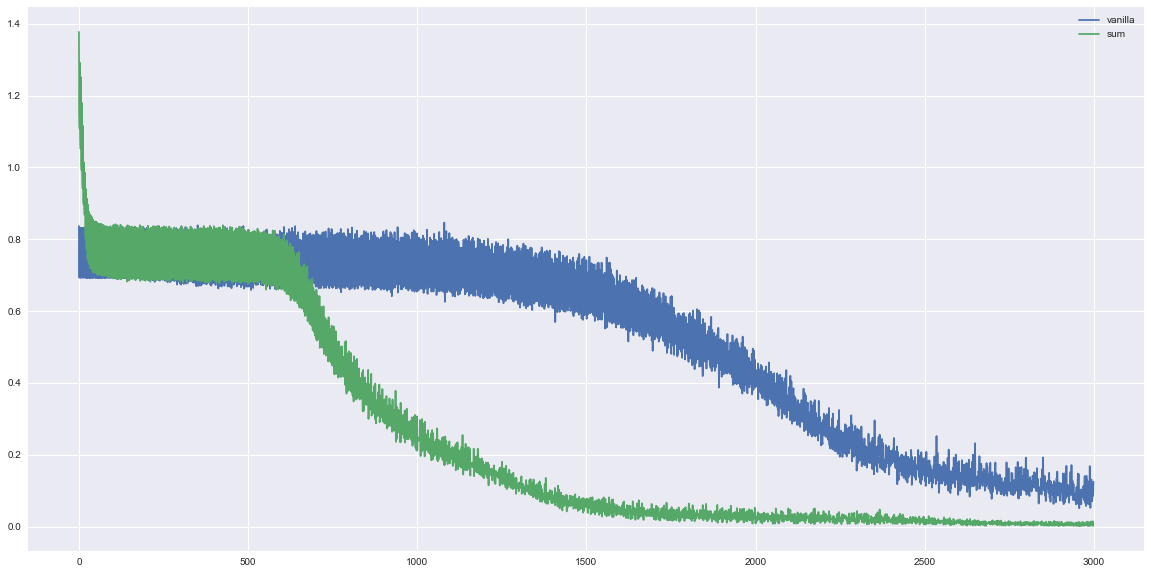

In [339]:
# batch size 50, 1000 epochs


%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
#matplotlib.style.use('ggplot')
import seaborn as sns

sns.set(color_codes=True)
fig, ax = plt.subplots(figsize=(20, 10))
plt.plot(losses)
plt.plot(new_losses)
plt.legend(['vanilla', 'sum'])